# <u>EDA on the USA Used car market</u>

Dataset used from the 'big_cars' dataset:

Original shape:
- Rows: 188,533
- Columns: 14

Cleaned shape:
- Rows: 160,970 
- Columns: 16

### <u>**Cleaning Summary**:</u>

##### **Consistency**:
Found major issues with consistency in columns ['brand', 'model', 'engine', 'transimission', 'ext_col', 'int_col']

- Created new columns using the 'engine' column: ['horsepower', 'liters', 'cylinders'].
- Split the 'model' column into 2 columns: ['model', 'trim'] - *(trim is the category like base model or premium)*.
- Fixed 'brand' column inconsistency.

##### **Completeness**:
Found missing values, especially after creating the above columns:

- horsepower column: had a lot of nulls, dealt with it by outsourcing the factual horsepower values based off of the engine specs already in the data as best I can.
- liters and cylinders columns: filled the electric cars with 0, dropped the rest of the Gasoline cars.
- handled a few nulls were in the form of symbols.

##### **Uniqueness**
No duplicates were found.

##### **Outliers**
Outliers removed from following columns using IQR:

- year: anything older than 2003
- price: prices over 150,000
- mileage: around more than 250,000 mileage
- horsepower: 0 horsepower or higher than 600

### <u>**Summary of findings from the below**:</u>
##### **Univariate Analysis Conclusion**

*Ordered by graph*

1. The cars offered in the USA used car market seem to be fairly new, with most of the cars are from the past 5 years.
2. Most offered cars have not been driven over 150,000 mileage, which could mean there's a pattern for purchase behavior as people tend to sell their cars and buy a new one when they have driven it for 150,000 miles.
3. 50% of the horsepower spec falls between 200 and 600, with 25% of that being about 300.
4. The engine liters seem to be split into 2 ranges, 2.0 to 4.0, and 4.0 to 6.0.
5. Cars with engine that have 6 cylinders seem to be what is mostly offered, with 8 cylinders trailing behind it, which could also explain the engine liters distribution.
6. Most cars seem to be below the price of 100,000, with the median being around 21,000.
7. The most sold brands of used cars in the USA market are Ford, Mercedes, Chevrolet, BMW, Audi, Porsche, Toyota, Lexus, Land Rover, and Jeep. This could indicate the popular choices too.
8. And the top 5 colors seem to be the standard colors, Black, White, Gray, Silver, and Blue.
9. The popular Transmission type is the Automatic, leading with about 90% of all cars.
10. The prefered Fuel Type in the US is the Gasoline, with over 140,000 cars in the dataset favoring that observation.

##### **Correlation Analysis**
Seems as though there are good correlations between Price and the Model Year, Mileage, and Horsepower/Engine, and a negative correlation with Damages, which is exactly what we need.

Features that MUST be used in the Machine Learning training:

1. Year.
2. Mileage.
3. Features of Engine specs, horsepower or liters or cylinders, or maybe combine the 3 somehow to have a representation of the Engine as a whole (Horsepower is a pretty good representation of the average person car knowledge).
4. Idealy, Brand and Model should be also included as categorical features.

In [8]:
import pandas as pd
import numpy as np

# To handle column strings cleaning
import re
import json

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Used Machine learning for visuals
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [9]:
def set_pandas_display_options() -> None:
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 10_000
    display.max_colwidth = 199
    display.width = 1000
    # display.precision = 2  # set as needed
    # display.float_format = lambda x: '{:,.2f}'.format(x)  # set as needed

set_pandas_display_options()


In [10]:
df = pd.read_csv('big_cars')

In [11]:
df[df['model'] == 'Countryman Cooper S']

Unnamed: 0      id          brand                model  model_year  milage fuel_type                                        engine                       transmission ext_col int_col                                accident clean_title  price
2033          2033    2033  Mercedes-Benz  Countryman Cooper S        2019   74725  Gasoline                    2.0L I4 16V GDI DOHC Turbo  7-Speed Automatic with Auto-Shift  Silver   Black                           None reported         Yes  30989
3844          3844    3844           MINI  Countryman Cooper S        2014  139355  Gasoline  181.0HP 1.6L 4 Cylinder Engine Gasoline Fuel                        6-Speed A/T   White    Gray                           None reported         Yes  12599
6279          6279    6279           MINI  Countryman Cooper S        2017   61700  Gasoline  316.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                        1-Speed A/T   Black   Black                           None reported         Yes  45000
22769        22769   22769           MINI  Countryman Cooper S        2020   19700  Gasoline  189.0HP 2.0L 4 Cylinder Engine Gasoline Fuel     Transmission w/Dual Shift Mode    Blue   Black                           None reported         Yes  33500
39708        39708   39708           MINI  Countryman Cooper S        2016  102360  Gasoline  189.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                                  2   Black       –  At least 1 accident or damage reported         Yes  45515
54899        54899   54899           MINI  Countryman Cooper S        2022    7652  Gasoline  189.0HP 2.0L 4 Cylinder Engine Gasoline Fuel     Transmission w/Dual Shift Mode   White   Black                           None reported         Yes  42800
181981      181981  181981           MINI  Countryman Cooper S        2021   15000  Gasoline  189.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                                A/T  Yellow   Black                           None reported         Yes  40000
183323      183323  183323           MINI  Countryman Cooper S        2020   27000  Gasoline  189.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                        8-Speed A/T    Blue   Black                           None reported         Yes  39900

In [12]:
df.shape

(188533, 14)

~~1. Reliability~~

~~2. Timeliness~~

~~3. Consistency~~

~~4. Relevence~~


~~5. Uniqueness~~


~~6. Completeness~~


~~7. Accuracy~~

In [13]:
cols = df.columns

In [14]:
# Consistency check

for col in cols:
    print(col)
    print(df[col].unique())
    print('--------------------------------')


Unnamed: 0
[     0      1      2 ... 188530 188531 188532]
--------------------------------
id
[     0      1      2 ... 188530 188531 188532]
--------------------------------
brand
['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach']
--------------------------------
model
['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'e-Golf SE'
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL']
--------------------------------
model_year
[2007 2002 2017 2021 2018 2016 2020 2015 2011 2013 2023 2019 2012 2014
 2008 2009 

# 3. Consistency

In [15]:
df.columns

Index(['Unnamed: 0', 'id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price'], dtype='object')

In [16]:
df.drop(columns='Unnamed: 0', inplace=True)

## Engine Column

In [17]:
for i in df['engine'].unique():
    print(i)

172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel
252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel
320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability
420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability
2.7L V6 24V PDI DOHC Twin Turbo
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel
312.0HP 3.6L V6 Cylinder Engine Gasoline Fuel
Electric Motor Electric Fuel System
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel
523.0HP 4.4L 8 Cylinder Engine Gasoline Fuel
503.0HP 4.0L 8 Cylinder Engine Gasoline Fuel
395.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid
310.0HP 4.6L 8 Cylinder Engine Gasoline Fuel
469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel
5.2L V10 40V PDI DOHC
429.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel
335.0HP 3.0L V6 Cylinder Engine Gasoline/Mild Ele

In [18]:
# Function to find the horsepower from the engine column, else null
def find_HP(engine):
    specs = engine.split(' ')

    for spec in specs:
        if 'HP' in spec:
            return spec.split('H')[0]
        
    return np.nan

In [19]:
# Function to find the liters from the engine column, else null
def find_L(engine):
    specs = engine.split(' ')

    for spec in specs:
        if 'L' in spec:
            return spec.split('L')[0]
        
        elif 'Liter' in spec:
            indx = specs.index('Liter')
            if indx > 0:
                return specs[indx - 1]
        
    return np.nan

In [20]:
# Function to find the Cylinders from the engine column, else null
def find_Cylinder(engine):
    specs = engine.split(' ')

    for spec in specs:
            
        if re.search(r'V\d+', spec):
            return spec.split('V')[1]
        
        elif re.search(r'I\d+', spec):
            return spec.split('I')[1]
        
        elif re.search(r'W\d+', spec):
            return spec.split('W')[1]
        
        elif re.search(r'H\d+', spec):
            return spec.split('H')[1]

        if 'Cylinder' in spec:
            indx = specs.index('Cylinder')
            if indx > 0:
                return specs[indx - 1]
        
    return np.nan

In [21]:
# creating horsepower column from engine column
df['horsepower'] = df['engine'].map(find_HP)

In [22]:
# creating liters column from engine column
df['liters'] = df['engine'].map(find_L)

In [23]:
# creating cylinders column from engine column
df['cylinders'] = df['engine'].map(find_Cylinder)

In [24]:
df[df['horsepower'].isnull()]

id          brand                                      model  model_year  milage fuel_type                               engine        transmission                         ext_col          int_col                                accident clean_title   price horsepower liters cylinders
8            8           Ford                                  F-150 XLT        2020   38352  Gasoline      2.7L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic  Snowflake White Pearl Metallic            Black                           None reported         Yes   62890        NaN    2.7         6
11          11          Tesla                              Model S P100D        2015   81500       NaN  Electric Motor Electric Fuel System         1-Speed A/T                            Gray            White                           None reported         Yes   19000        NaN    NaN       NaN
20          20           Land                           Rover Defender S        2023    7978  Gasoline                5.2L V10 40V PDI DOHC   8-Speed Automatic        Santorini Black Metallic            Black                           None reported         NaN   41998        NaN    5.2        10
39          39          Buick                            Enclave Premium        2022    9642  Gasoline                 3.6L V6 24V GDI DOHC   9-Speed Automatic         Ebony Twilight Metallic  Dark Galvanized                           None reported         Yes   63900        NaN    3.6         6
43          43  Mercedes-Benz                             AMG GT 53 Base        2022   10972  Gasoline      4.0L V8 32V GDI DOHC Twin Turbo   8-Speed Automatic        Magnetite Black Metallic            Black                           None reported         Yes  244896        NaN    4.0         8
...        ...            ...                                        ...         ...     ...       ...                                  ...                 ...                             ...              ...                                     ...         ...     ...        ...    ...       ...
188511  188511           Land  Rover Range Rover Velar P380 SE R-Dynamic        2022   15198  Gasoline           2.0L I4 16V GDI DOHC Turbo   8-Speed Automatic                     Firenze Red            Ebony                           None reported         NaN   23739        NaN    2.0         4
188513  188513          Lexus                             GS 350 F Sport        2022   82046  Gasoline                 3.5L V6 24V PDI DOHC   8-Speed Automatic                          Caviar            Black                           None reported         NaN   48990        NaN    3.5         6
188515  188515            GMC                Sierra 1500 Denali Ultimate        2023    9978  Gasoline                  6.2L V8 16V GDI OHV        10-Speed A/T            White Frost Tri-Coat           Walnut  At least 1 accident or damage reported         Yes   48999        NaN    6.2         8
188520  188520  Mercedes-Benz                            GLC 300 GLC 300        2022   18031  Gasoline                      2.0 Liter Turbo           Automatic                           White            Black                           None reported         NaN   39998        NaN              NaN
188531  188531           Audi                           S5 3.0T Prestige        2022   13895  Gasoline                                 3.0L   1-Speed Automatic       Daytona Gray Pearl Effect            Black                           None reported         NaN   84900        NaN    3.0       NaN

[33259 rows x 16 columns]

In [25]:
test = df[(df['model'] == 'AMG GT 53 Base') & (df['horsepower'].isnull())]

In [26]:
test2 = df[(df['horsepower'].isnull())]

In [27]:
test3 = test2['engine'].unique()

In [28]:
test3 = pd.DataFrame(test3)
test3.rename(columns={0:'engine'}, inplace=True)

In [29]:
test3['horsepower'] = np.nan

In [30]:
# test3.to_csv('engine.csv', index=False)

In [31]:
test['engine'].unique()

array(['4.0L V8 32V GDI DOHC Twin Turbo', '3.0 Liter Turbo',
       '3.0L I6 24V GDI DOHC Turbo', '4.0 Liter Twin Turbo',
       '3.0L V6 24V GDI DOHC Twin Turbo', '6.2 Liter',
       '3.0L V6 24V GDI DOHC Turbo', '3.0 Liter', '3.0 Liter GTDI',
       '4.0L V8 32V MPFI DOHC Twin Turbo', '–', '4.4 Liter Twin Turbo'],
      dtype=object)

In [32]:
df_engine = pd.read_csv('Final_Fully_Completed_Horsepower_Data.csv')

In [33]:
df_engine['horsepower'].isnull().sum()

0

In [34]:
df_engine[df_engine['horsepower'] == 1500]

engine  horsepower
161  8.0L W16 64V GDI DOHC Twin Turbo        1500

In [35]:
df2= df.copy()

In [36]:
df2['horsepower'].isnull().sum()

33259

In [37]:
# Assuming df_real is the new dataset and df_engine is the one you just worked with.

# Merge df_real with df_engine based on the 'engine' column
df = df.merge(df_engine[['engine', 'horsepower']], on='engine', how='left', suffixes=('', '_engine'))

# Fill the missing horsepower values in df_real with those from df_engine
df['horsepower'] = df['horsepower'].fillna(df['horsepower_engine'])

# Drop the temporary 'horsepower_engine' column
df = df.drop(columns=['horsepower_engine'])

# Now df_real has the horsepower values filled based on df_engine


In [38]:
df['horsepower'].isnull().sum()

0

In [39]:
df['liters'].isnull().sum()

6698

In [40]:
df['cylinders'].isnull().sum()

14226

In [41]:
df['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [42]:
df['brand'] = df.apply(lambda row: 'BMW' if row['model'] == 'i8 Base' else row['brand'], axis=1)

In [43]:
len(df['model'].unique())

1897

In [44]:
for i in df['model'].unique():
    print(i)

Cooper S Base
LS V8
Silverado 2500 LT
G90 5.0 Ultimate
Metris Base
A6 2.0T Sport
A8 L 3.0T
Silverado 1500 1LZ
F-150 XLT
M4 Base
Camaro 1LT
Model S P100D
Escalade ESV Platinum
S4 3.0T Premium Plus
Rover Range Rover P530 SE SWB
AMG C 63 S
Yukon Denali
Rover Defender SE
Tundra SR5
AMG C 63 Base
Rover Defender S
Equus Signature
Mustang Premium
A8 L 55
XC70 T6 Platinum
Sequoia Limited
F-250 XLT
Tacoma PreRunner
A5 2.0T Premium
A3 2.0T Premium
E-Class E 300
E-Class E 350 4MATIC
Jetta S
528 i xDrive
330 i xDrive
AMG G 63 Base
C-Class C 300 4MATIC Sport
Enclave Premium
328 xi
Corvette Grand Sport
AMG GT 53 Base
R1S Adventure Package
1500 Laramie
Corvette Base
H2 Base
Romeo Stelvio Ti Sport
QX60 Base
Model 3 Long Range
Model X 75D
Genesis Coupe 3.8 Base
M6 Base
Gladiator Rubicon
Thunderbird Deluxe
Rover Range Rover Sport HSE
SL-Class SL500 Roadster
GLS 450 Base 4MATIC
Cayenne Base
Corvette Stingray w/2LT
SSR Base
M5 Base
86 860 Special Edition
G-Class G 550 4MATIC
Camry SE
E-Class E 350
570S Sp

In [45]:
# df['model'] = df['model'].apply(lambda x: x if not x.endswith(' 4MATIC') else x.replace(' 4MATIC', ''))
# df['model'] = df['model'].apply(lambda x: ' '.join(dict.fromkeys(x.split())))
# df['model'] = df['model'].apply(lambda x: x.replace(' 4MATIC', '').replace('4MATIC ', '').replace('4MATIC', ''))
# df['model'] = df['model'].apply(lambda x: x.replace(' SL-Class', '').replace('SL-Class ', '').replace('SL-Class', ''))
# df['model'] = df['model'].apply(lambda x: x.replace(' S-Class', '').replace('S-Class ', '').replace('S-Class', ''))
# df['model'] = df['model'].apply(lambda x: re.sub(r'(\b[A-Za-z]) (\d+)', r'\1\2', x))
# df['model'] = df['model'].apply(lambda x: re.sub(r'(\b[A-Za-z]+) (\d+)', r'\1\2', x))
# df['model'] = df['model'].apply(lambda x: x.replace('C-Class ', '').strip())
# df['model'] = df['model'].apply(lambda x: x.replace('E-Class ', '').strip())
# df['model'] = df['model'].apply(lambda x: x.replace('G-Class ', '').strip())
# df['model'] = df['model'].apply(lambda x: x.replace('GLA-Class ', '').strip())
# df['model'] = df['model'].apply(lambda x: x.replace('CLCL', 'CLS'))
# df['model'] = df['model'].apply(lambda x: x.replace('CLSS63', 'CLS63'))
# df['model'] = df['model'].apply(lambda x: x.replace('AMG GT C', 'AMG GTC'))
# df['model'] = df['model'].apply(lambda x: x.replace('AMG GT R', 'AMG GTR'))
# df['model'] = df['model'].apply(lambda x: x.replace('AMG GT S', 'AMG GTS'))
# df['model'] = df['model'].apply(lambda x: x + ' Base' if len(x.split()) == 2 else x)
# df['model'] = df['model'].apply(lambda x: x.replace('AMG', '').replace('  ', ' ').strip())
# SL-Class
# S-Class
# GLC300 GLC300
# C43 C43

In [46]:
# Load the dictionary from the file
with open('car_model_dict.json', 'r') as file:
    loaded_dict = json.load(file)
    
# Function to update the 'brand' column if model matches a dictionary key
def update_brand(row):
    model = row['model']
    # Check if model exists in the dictionary
    if model in loaded_dict:
        return loaded_dict[model]  # Return the brand from the dictionary
    return row['brand']  # If no match, keep the existing brand

# Apply the function to the DataFrame
df['brand'] = df.apply(update_brand, axis=1)

In [47]:
mercedes_models = [
    'AMG C 43 AMG C 43 4MATIC', 'AMG C 43 Base 4MATIC', 'AMG E 53 Base 4MATIC',
    'AMG E 63 S 4MATIC', 'AMG G 63 Base', 'AMG GL AMG GL 63 4MATIC',
    'AMG GLC 63 Base 4MATIC', 'AMG GLE 43 Coupe 4MATIC', 'AMG GLS 63 4MATIC',
    'AMG GT 53 Base', 'AMG GT AMG GT S', 'AMG GT C', 'G-Class G 63 AMG',
    'S-Class S 63 AMG', 'SL-Class SL63 AMG Roadster'
]

# Update 'brand' to 'Mercedes-Benz' if 'model' is in the mercedes_models list
df.loc[df['model'].isin(mercedes_models), 'brand'] = 'Mercedes-Benz'

In [48]:
# Apply transformations only when df['brand'] == 'Mercedes-Benz'
df['model'] = df['model'].apply(lambda x: ' '.join(dict.fromkeys(x.split())))

df['model'] = df.apply(lambda row: (
    row['model'].replace(' 4MATIC', '').replace('4MATIC', '').replace('4MATIC ', '') 
    .replace(' SL-Class', '').replace('SL-Class', '').replace('SL-Class ', '')
    .replace(' S-Class', '').replace('S-Class', '').replace('S-Class ', '')
    .replace(' C-Class', '').replace('C-Class', '').replace('C-Class ', '') 
    .replace(' E-Class', '').replace('E-Class', '').replace('E-Class ', '')
    .replace(' G-Class', '').replace('G-Class', '').replace('G-Class ', '')
    .replace(' GLA-Class', '').replace('GLA-Class', '').replace('GLA-Class ', '')
    .replace(' CLK-Class', '').replace('CLK-Class', '').replace('CLK-Class ', '')
    .replace(' S-Model', ' ').replace('S-Model', ' ').replace('S-Model ', ' ')
    .replace('CLCL', 'CLS')
    .replace('CLSS63', 'CLS63') 
    .replace('AMG GT C', 'AMG GTC')
    .replace('AMG GT R', 'AMG GTR')
    .replace('AMG GT S', 'AMG GTS')
    .replace('AMG', '').replace('  ', ' ').strip()  
    if row['brand'] == 'Mercedes-Benz' else row['model']
), axis=1)

# Fix letter + number spaces for Mercedes-Benz models
df['model'] = df.apply(lambda row: (
    re.sub(r'(\b[A-Za-z]+) (\d+)', r'\1\2', row['model']) 
    if row['brand'] == 'Mercedes-Benz' else row['model']  
), axis=1)

# Add 'Base' if the model has exactly two words for Mercedes-Benz models
df['model'] = df.apply(lambda row: (
    row['model'] + ' Base' if len(row['model'].split()) == 2 else row['model'] 
    if row['brand'] == 'Mercedes-Benz' else row['model']
), axis=1)

In [49]:
df['model'] = df['model'].apply(lambda x: x.replace('Base Base', 'Base'))

In [50]:
df['model'] = df['model'].apply(lambda x: x + ' Base' if len(x.split()) == 1 else x)

In [51]:
# df['model_new'] = df['model'].map(lambda x: x.split(' ')[0])
df['model_new'] = df['model'].map(lambda x: ' '.join(x.split(' ')[:-1]) if ' ' in x else x)

# df['trim'] = df['model'].map(lambda x: x.split(' ')[-1])
df['trim'] = df['model'].map(lambda x: x.split(' ')[-1] if ' ' in x else x)


In [52]:
df.rename(columns={'model': 'model_old', "model_new": "model"}, inplace=True)

In [53]:
df['accident'] = df['accident'].fillna('0')

In [54]:
df['accident'].replace('At least 1 accident or damage reported', '1', inplace=True)
df['accident'].replace('None reported', '0', inplace=True)

In [55]:
ext_colors = df['ext_col'].unique()

In [56]:
ext_colors

array(['Yellow', 'Silver', 'Blue', 'Black', 'White',
       'Snowflake White Pearl Metallic', 'Gray', 'Green',
       'Santorini Black Metallic', 'Purple', 'Ebony Twilight Metallic',
       'Red', 'Magnetite Black Metallic', 'Diamond Black', 'Vega Blue',
       'Beige', 'Gold', 'Platinum White Pearl', 'Metallic',
       'White Frost Tri-Coat', 'Firecracker Red Clearcoat',
       'Phytonic Blue Metallic', 'Blu', 'Orange', 'Brown',
       'Brilliant Silver Metallic', 'Black Raven', 'Black Clearcoat',
       'Firenze Red', 'Agate Black Metallic', 'Glacial White Pearl',
       'Majestic Plum Metallic', 'designo Diamond White Metallic',
       'Oxford White', 'Black Sapphire Metallic', 'Mythos Black',
       'Granite Crystal Clearcoat Metallic', 'White Diamond Tri-Coat',
       'Magnetite Gray Metallic', 'Carpathian Grey Premium Metallic',
       'designo Diamond White Bright',
       'Phantom Black Pearl Effect / Black Roof', 'Nebula Gray Pearl',
       'Deep Crystal Blue Mica', 'Flame Red

In [57]:
common_colors = ['Yellow', 'Silver', 'Blue', 'Black', 'White', 'Gray', 'Green', 'Purple', 'Red', 'Beige', 'Gold', 
                 'Brown', 'Orange', 'Pink', 'Tan', 'Bronze', 'Maroon', 'Aqua', 'Teal', 'Ivory', 'Lavender'
                 , 'Granite', 'Ebony', 'Plum', 'Grey', 'Ash', 'Quartz', 'Magnetic', 'Tungsten', 'Noir',
                 'Quicksilver', 'Arancio', 'Grey', 'Nero', 'Pearl', 'Rosso', 'Magno', 'Ruby', 'Sandstone',
                 'Sapphire', 'Dark', 'Infrared', 'Iridium', 'Custom', 'Lunar', 'Gecko', 'BLU', 'Garnet', 'Bianco',
                 'Steel', 'Moonlight', 'Slate', 'Moss', 'Nightfall', 'Platinum', 'Mountain', 'Gun',
                 'Sunset', 'Hellayella', 'C', 'Rift', 'Ember', 'Billet', 'Grigio', 'Ametrin', 'SILVER', 'Mango']

In [58]:
def ext_color(color):
    colors = color.split()

    for c in colors:
        if c in common_colors:
            return c
    
    return color

In [59]:
df['ext_col'] = df['ext_col'].map(ext_color)

In [60]:
df['ext_col'].replace('–', np.nan, inplace=True)
df['ext_col'].replace('C', np.nan, inplace=True)
df['ext_col'].replace('Go Mango!', 'Mango', inplace=True)
df['ext_col'].replace('Blu', 'Blue', inplace=True)
df['ext_col'].replace('Quicksilver', 'Silver', inplace=True)
df['ext_col'].replace('Blueprint', 'Blue', inplace=True)
df['ext_col'].replace('BLU', 'Blue', inplace=True)
df['ext_col'].replace('Stormy Sea', 'Blue', inplace=True)
df['ext_col'].replace('Dark', 'Black', inplace=True)
df['ext_col'].replace('Grey', 'Gray', inplace=True)
df['ext_col'].replace('Yulong', 'White', inplace=True)
df['ext_col'].replace('Hellayella', 'Yellow', inplace=True)
df['ext_col'].replace('Mountain', 'Green', inplace=True)
df['ext_col'].replace('Noir', 'Black', inplace=True)
df['ext_col'].replace('Onyx', 'Black', inplace=True)
df['ext_col'].replace('Tempest', 'Blue', inplace=True)
df['ext_col'].replace('Obsidian', 'Black', inplace=True)
df['ext_col'].replace('Infrared', 'Red', inplace=True)
df['ext_col'].replace('Ice', 'Blue', inplace=True)
df['ext_col'].replace('Glacier', 'Blue', inplace=True)
df['ext_col'].replace('Rift', 'White', inplace=True)
df['ext_col'].replace('Magnetic', 'Gray', inplace=True)
df['ext_col'].replace('Arancio', 'Orange', inplace=True)
df['ext_col'].replace('Platinum', 'Silver', inplace=True)
df['ext_col'].replace('Tungsten', 'Silver', inplace=True)
df['ext_col'].replace('Garnet', 'Red', inplace=True)
df['ext_col'].replace('Rosso', 'Red', inplace=True)
df['ext_col'].replace('Nero', 'Black', inplace=True)
df['ext_col'].replace('Ruby', 'Red', inplace=True)
df['ext_col'].replace('Nightfall', 'Gray', inplace=True)
df['ext_col'].replace('Moonlight', 'Blue', inplace=True)
df['ext_col'].replace('Ametrin', 'Purple', inplace=True)
df['ext_col'].replace('Grigio', 'Gray', inplace=True)
df['ext_col'].replace('Maroon', 'Red', inplace=True)
df['ext_col'].replace('Sunset', 'Orange', inplace=True)
df['ext_col'].replace('Gun', 'Gray', inplace=True)
df['ext_col'].replace('Bianco', 'Beige', inplace=True)
df['ext_col'].replace('Gecko', 'Gray', inplace=True)
df['ext_col'].replace('Chalk', 'White', inplace=True)
df['ext_col'].replace('Plum', 'Purple', inplace=True)
df['ext_col'].replace('Metallic', 'Silver', inplace=True)
df['ext_col'].replace('Caviar', 'Black', inplace=True)
df['ext_col'].replace('Verde', 'Green', inplace=True)
df['ext_col'].replace('Ember', 'Orange', inplace=True)
df['ext_col'].replace('Sandstone', 'Beige', inplace=True)
df['ext_col'].replace('Billet', 'Silver', inplace=True)
df['ext_col'].replace('Iridium', 'Silver', inplace=True)


In [61]:
df['ext_col'] = df['ext_col'].str.lower()


In [62]:
df['clean_title'].fillna('No', inplace=True)

In [63]:
df['clean_title'].unique()

array(['Yes', 'No'], dtype=object)

In [64]:
df

id          brand              model_old  model_year  milage      fuel_type                                               engine                    transmission ext_col int_col accident clean_title  price horsepower liters cylinders           model      trim
0            0           Mini          Cooper S Base        2007  213000       Gasoline         172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel                             A/T  yellow    Gray        0         Yes   4200      172.0    1.6         4        Cooper S      Base
1            1        Lincoln             LS V8 Base        2002  143250       Gasoline         252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel                             A/T  silver   Beige        1         Yes   4999      252.0    3.9         8           LS V8      Base
2            2      Chevrolet      Silverado 2500 LT        2002  136731  E85 Flex Fuel  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability                             A/T    blue    Gray        0         Yes  13900      320.0    5.3         8  Silverado 2500        LT
3            3        Genesis       G90 5.0 Ultimate        2017   19500       Gasoline         420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel  Transmission w/Dual Shift Mode   black   Black        0         Yes  45000      420.0    5.0         8         G90 5.0  Ultimate
4            4  Mercedes-Benz            Metris Base        2021    7388       Gasoline         208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                     7-Speed A/T   black   Beige        0         Yes  97500      208.0    2.0         4          Metris      Base
...        ...            ...                    ...         ...     ...            ...                                                  ...                             ...     ...     ...      ...         ...    ...        ...    ...       ...             ...       ...
188528  188528       Cadillac  Escalade ESV Platinum        2017   49000       Gasoline         420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel  Transmission w/Dual Shift Mode   white   Beige        0         Yes  27500      420.0    6.2         8    Escalade ESV  Platinum
188529  188529  Mercedes-Benz               C43 Base        2018   28600       Gasoline        385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel                     8-Speed A/T   white   Black        1         Yes  30000      385.0    3.0         6             C43      Base
188530  188530  Mercedes-Benz             GLC63 Base        2021   13650       Gasoline         469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel                     7-Speed A/T   white   Black        0         Yes  86900      469.0    4.0         8           GLC63      Base
188531  188531           Audi       S5 3.0T Prestige        2022   13895       Gasoline                                                 3.0L               1-Speed Automatic    gray   Black        0          No  84900      225.0    3.0       NaN         S5 3.0T  Prestige
188532  188532        Porsche             Macan Base        2016   59500       Gasoline         252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel  Transmission w/Dual Shift Mode   white   Black        0         Yes  28995      252.0    2.0         4           Macan      Base

[188533 rows x 18 columns]

In [65]:
#transmission_clear
def simplify_transmission(transmission):
    transmission = str(transmission).lower()
    if 'm/t' in transmission or 'manual' in transmission:
        return 'Manual'
    else:
        return 'Automatic'

df['transmission'] = df['transmission'].apply(simplify_transmission)

#color_split
def safe_split(x):
    if isinstance(x, str):
        parts = x.split(' ')

        return parts[1] if len(parts) > 1 else x

    return x

df['int_col'] = df['int_col'].map(safe_split)

#full_clear
def simplify_fuel(fuel):
    fuel = str(fuel).lower()
    if 'e85 flex fuel' in fuel or 'gasoline' in fuel:
        return 'Gasoline'
    elif 'plug-in hybrid' in fuel or 'hybrid' in fuel:
        return 'Hybrid'

    elif 'not supported' in fuel or 'gasoline' in fuel:
        return 'Gasoline'

    elif 'diesel' in fuel or 'diesel' in fuel:
        return 'Diesel'

    elif 'plug-in hybrid' in fuel or 'hybrid' in fuel:
        return 'Hybrid'
    elif 'gasoline' in fuel or 'gasoline' in fuel:
        return 'Gasoline'
    else:
        return 'Electric'

df['fuel_type'] = df['fuel_type'].apply(simplify_fuel)
df['fuel_type'].value_counts()


fuel_type
Gasoline    171361
Hybrid        7353
Electric      5864
Diesel        3955
Name: count, dtype: int64

In [66]:
df.head()

id          brand          model_old  model_year  milage fuel_type                                               engine transmission ext_col int_col accident clean_title  price horsepower liters cylinders           model      trim
0   0           Mini      Cooper S Base        2007  213000  Gasoline         172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel    Automatic  yellow    Gray        0         Yes   4200      172.0    1.6         4        Cooper S      Base
1   1        Lincoln         LS V8 Base        2002  143250  Gasoline         252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel    Automatic  silver   Beige        1         Yes   4999      252.0    3.9         8           LS V8      Base
2   2      Chevrolet  Silverado 2500 LT        2002  136731  Gasoline  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability    Automatic    blue    Gray        0         Yes  13900      320.0    5.3         8  Silverado 2500        LT
3   3        Genesis   G90 5.0 Ultimate        2017   19500  Gasoline         420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel    Automatic   black   Black        0         Yes  45000      420.0    5.0         8         G90 5.0  Ultimate
4   4  Mercedes-Benz        Metris Base        2021    7388  Gasoline         208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel    Automatic   black   Beige        0         Yes  97500      208.0    2.0         4          Metris      Base

In [67]:
df.isnull().sum()

id                  0
brand               0
model_old           0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col           400
int_col             0
accident            0
clean_title         0
price               0
horsepower          0
liters           6698
cylinders       14226
model               0
trim                0
dtype: int64

In [68]:
df['ext_col'].value_counts()

ext_col
black      54383
white      47899
gray       27443
silver     19073
blue       15920
red        12158
green       2974
gold        1668
beige       1226
orange      1224
brown       1185
yellow      1012
ebony        408
purple       382
granite      379
lunar        243
steel        179
pearl        157
tan           47
quartz        45
bronze        36
magno         32
custom        23
pink          23
mango         14
Name: count, dtype: int64

In [69]:


# Define the colors to randomly choose from
colors = ['black', 'white', 'gray']

# Create a random Series of colors for the null values
random_colors = pd.Series(np.random.choice(colors, size=df['ext_col'].isnull().sum()), 
                          index=df[df['ext_col'].isnull()].index)

# Fill the null values in 'ext_col' with the randomly selected colors
df['ext_col'] = df['ext_col'].fillna(random_colors)


In [70]:
df.isnull().sum()

id                  0
brand               0
model_old           0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title         0
price               0
horsepower          0
liters           6698
cylinders       14226
model               0
trim                0
dtype: int64

In [71]:
df.head(0)

Empty DataFrame
Columns: [id, brand, model_old, model_year, milage, fuel_type, engine, transmission, ext_col, int_col, accident, clean_title, price, horsepower, liters, cylinders, model, trim]
Index: []

In [72]:
df.rename(columns={'model_old': 'model_old_ds', 'milage': 'mileage', 'ext_col': 'exterior_color',
                    'int_col': 'interior_color', 'accident': 'damage'}, inplace=True)

In [73]:
# df.to_csv('big_cars_semi_clean.csv', index=False)

In [74]:
test = df.copy()

In [75]:
test.head()

id          brand       model_old_ds  model_year  mileage fuel_type                                               engine transmission exterior_color interior_color damage clean_title  price horsepower liters cylinders           model      trim
0   0           Mini      Cooper S Base        2007   213000  Gasoline         172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel    Automatic         yellow           Gray      0         Yes   4200      172.0    1.6         4        Cooper S      Base
1   1        Lincoln         LS V8 Base        2002   143250  Gasoline         252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel    Automatic         silver          Beige      1         Yes   4999      252.0    3.9         8           LS V8      Base
2   2      Chevrolet  Silverado 2500 LT        2002   136731  Gasoline  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability    Automatic           blue           Gray      0         Yes  13900      320.0    5.3         8  Silverado 2500        LT
3   3        Genesis   G90 5.0 Ultimate        2017    19500  Gasoline         420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel    Automatic          black          Black      0         Yes  45000      420.0    5.0         8         G90 5.0  Ultimate
4   4  Mercedes-Benz        Metris Base        2021     7388  Gasoline         208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel    Automatic          black          Beige      0         Yes  97500      208.0    2.0         4          Metris      Base

In [76]:
test.duplicated().sum()

0

In [77]:
test.isnull().sum()

id                    0
brand                 0
model_old_ds          0
model_year            0
mileage               0
fuel_type             0
engine                0
transmission          0
exterior_color        0
interior_color        0
damage                0
clean_title           0
price                 0
horsepower            0
liters             6698
cylinders         14226
model                 0
trim                  0
dtype: int64

In [78]:
test = test[~((test['cylinders'].isnull()) & (test['fuel_type'] != 'Electric'))]
test['cylinders']=test['cylinders'].fillna('0')
test['liters']=test['liters'].fillna('0')

In [79]:
test.head()

id          brand       model_old_ds  model_year  mileage fuel_type                                               engine transmission exterior_color interior_color damage clean_title  price horsepower liters cylinders           model      trim
0   0           Mini      Cooper S Base        2007   213000  Gasoline         172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel    Automatic         yellow           Gray      0         Yes   4200      172.0    1.6         4        Cooper S      Base
1   1        Lincoln         LS V8 Base        2002   143250  Gasoline         252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel    Automatic         silver          Beige      1         Yes   4999      252.0    3.9         8           LS V8      Base
2   2      Chevrolet  Silverado 2500 LT        2002   136731  Gasoline  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability    Automatic           blue           Gray      0         Yes  13900      320.0    5.3         8  Silverado 2500        LT
3   3        Genesis   G90 5.0 Ultimate        2017    19500  Gasoline         420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel    Automatic          black          Black      0         Yes  45000      420.0    5.0         8         G90 5.0  Ultimate
4   4  Mercedes-Benz        Metris Base        2021     7388  Gasoline         208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel    Automatic          black          Beige      0         Yes  97500      208.0    2.0         4          Metris      Base

In [80]:
test.columns

Index(['id', 'brand', 'model_old_ds', 'model_year', 'mileage', 'fuel_type', 'engine', 'transmission', 'exterior_color', 'interior_color', 'damage', 'clean_title', 'price', 'horsepower', 'liters', 'cylinders', 'model', 'trim'], dtype='object')

In [81]:
test.drop(columns=['model_old_ds', 'engine'], inplace=True)

In [82]:
models = test['model'].unique()

In [83]:
test['model'].replace('CL CLS63', 'CLS63', inplace=True)

In [84]:
test[test['model'] == 'CLS63']

id          brand  model_year  mileage fuel_type transmission exterior_color interior_color damage clean_title   price horsepower liters cylinders  model  trim
1605      1605  Mercedes-Benz        2015    46873    Hybrid    Automatic          white          Black      0         Yes   19900      369.0    1.5         3  CLS63  Base
10157    10157  Mercedes-Benz        2016    15698  Gasoline    Automatic          white          Beige      0         Yes   67100      577.0    5.5         8  CLS63  Base
10954    10954  Mercedes-Benz        2015    64500  Gasoline    Automatic         silver          White      1         Yes   60995      577.0    5.5         8  CLS63  Base
11215    11215  Mercedes-Benz        2007    28800  Gasoline    Automatic          white          Brown      0         Yes   74900      382.0    5.5         8  CLS63  Base
23057    23057  Mercedes-Benz        2016    32936  Gasoline    Automatic          white          Black      0         Yes   75000      577.0    5.5         8  CLS63  Base
25311    25311  Mercedes-Benz        2014     4500  Gasoline    Automatic          black          Black      0         Yes   25000      302.0    3.5         6  CLS63  Base
27024    27024  Mercedes-Benz        2014    71669  Gasoline    Automatic          black          Black      0          No   28000      577.0    5.5         8  CLS63  Base
27790    27790  Mercedes-Benz        2007    47000  Gasoline    Automatic         silver          Black      0         Yes   20490      577.0    5.5         8  CLS63  Base
29740    29740  Mercedes-Benz        2012    14806  Gasoline    Automatic          white          White      0         Yes   66400      577.0    5.5         8  CLS63  Base
32972    32972  Mercedes-Benz        2012    99100  Gasoline    Automatic          black          Black      0         Yes   64900      577.0    5.5         8  CLS63  Base
34539    34539  Mercedes-Benz        2014    46891  Gasoline    Automatic           gray          White      0         Yes  399900      577.0    5.5         8  CLS63  Base
47757    47757  Mercedes-Benz        2016    16754  Gasoline    Automatic          black          Black      0          No  113000      577.0    5.5         8  CLS63  Base
49858    49858  Mercedes-Benz        2020    13554  Gasoline       Manual          black          Black      0         Yes  209000      577.0    5.5         8  CLS63  Base
53989    53989  Mercedes-Benz        2015    64500  Gasoline    Automatic         silver          Black      1         Yes   19950      577.0    5.5         8  CLS63  Base
65104    65104  Mercedes-Benz        2016    24158  Gasoline    Automatic          black          Black      0         Yes   64250      577.0    5.5         8  CLS63  Base
117430  117430  Mercedes-Benz        2014    39800  Gasoline    Automatic          black              –      0         Yes   52500      577.0    5.5         8  CLS63  Base
136260  136260  Mercedes-Benz        2012    67000  Gasoline    Automatic           gray          Black      0         Yes   23000      577.0    5.5         8  CLS63  Base
141276  141276  Mercedes-Benz        2013    54082  Gasoline    Automatic          white          Beige      0         Yes   25990      577.0    5.5         8  CLS63  Base
163289  163289  Mercedes-Benz        2023     1877  Gasoline       Manual          black            Red      0         Yes  185500      577.0    5.5         8  CLS63  Base
187400  187400  Mercedes-Benz        2014    34600  Gasoline    Automatic          white          Brown      0         Yes   30750      577.0    5.5         8  CLS63  Base

In [85]:


# Define a flexible regex pattern to match similar substrings
pattern = r'\b(?:\d+\.\d+[iTXLt]?)\b|\bV10\b|\b2\+2\b'

# Remove the matching patterns using regex and strip extra spaces
test['model'] = test['model'].astype(str).str.replace(pattern, '', regex=True).str.strip()

test['model'] = test['model'].replace(r'\s+', ' ', regex=True).str.strip()



In [86]:
models2 = test['model'].unique()

In [87]:
test.head()

id          brand  model_year  mileage fuel_type transmission exterior_color interior_color damage clean_title  price horsepower liters cylinders           model      trim
0   0           Mini        2007   213000  Gasoline    Automatic         yellow           Gray      0         Yes   4200      172.0    1.6         4        Cooper S      Base
1   1        Lincoln        2002   143250  Gasoline    Automatic         silver          Beige      1         Yes   4999      252.0    3.9         8           LS V8      Base
2   2      Chevrolet        2002   136731  Gasoline    Automatic           blue           Gray      0         Yes  13900      320.0    5.3         8  Silverado 2500        LT
3   3        Genesis        2017    19500  Gasoline    Automatic          black          Black      0         Yes  45000      420.0    5.0         8             G90  Ultimate
4   4  Mercedes-Benz        2021     7388  Gasoline    Automatic          black          Beige      0         Yes  97500      208.0    2.0         4          Metris      Base

In [88]:
test.rename(columns={'model_year': 'year'}, inplace=True)

In [89]:
# Desired order of columns
new_column_order = ['id', 'brand', 'model', 'trim', 'year', 'exterior_color', 'interior_color', 'mileage', 'horsepower', 'liters', 'cylinders', 'transmission', 'fuel_type', 'damage', 'clean_title', 'price']

# Rearrange the DataFrame based on the new column order
test = test[new_column_order]

In [90]:
test.head()

id          brand           model      trim  year exterior_color interior_color  mileage horsepower liters cylinders transmission fuel_type damage clean_title  price
0   0           Mini        Cooper S      Base  2007         yellow           Gray   213000      172.0    1.6         4    Automatic  Gasoline      0         Yes   4200
1   1        Lincoln           LS V8      Base  2002         silver          Beige   143250      252.0    3.9         8    Automatic  Gasoline      1         Yes   4999
2   2      Chevrolet  Silverado 2500        LT  2002           blue           Gray   136731      320.0    5.3         8    Automatic  Gasoline      0         Yes  13900
3   3        Genesis             G90  Ultimate  2017          black          Black    19500      420.0    5.0         8    Automatic  Gasoline      0         Yes  45000
4   4  Mercedes-Benz          Metris      Base  2021          black          Beige     7388      208.0    2.0         4    Automatic  Gasoline      0         Yes  97500

In [91]:
df_cleaned = test.copy()

# Completeness

In [92]:
df_cleaned['interior_color'].replace('–', 'Black', inplace=True)
df_cleaned['interior_color'].replace('/', 'Black', inplace=True)

In [93]:
df_cleaned['liters'].replace('', '0', inplace=True)

# Uniqueness

In [94]:
df_cleaned.duplicated().sum()

0

# Accuracy

In [95]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180083 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              180083 non-null  int64 
 1   brand           180083 non-null  object
 2   model           180083 non-null  object
 3   trim            180083 non-null  object
 4   year            180083 non-null  int64 
 5   exterior_color  180083 non-null  object
 6   interior_color  180083 non-null  object
 7   mileage         180083 non-null  int64 
 8   horsepower      180083 non-null  object
 9   liters          180083 non-null  object
 10  cylinders       180083 non-null  object
 11  transmission    180083 non-null  object
 12  fuel_type       180083 non-null  object
 13  damage          180083 non-null  object
 14  clean_title     180083 non-null  object
 15  price           180083 non-null  int64 
dtypes: int64(4), object(12)
memory usage: 23.4+ MB


In [96]:
df_cleaned.head()

id          brand           model      trim  year exterior_color interior_color  mileage horsepower liters cylinders transmission fuel_type damage clean_title  price
0   0           Mini        Cooper S      Base  2007         yellow           Gray   213000      172.0    1.6         4    Automatic  Gasoline      0         Yes   4200
1   1        Lincoln           LS V8      Base  2002         silver          Beige   143250      252.0    3.9         8    Automatic  Gasoline      1         Yes   4999
2   2      Chevrolet  Silverado 2500        LT  2002           blue           Gray   136731      320.0    5.3         8    Automatic  Gasoline      0         Yes  13900
3   3        Genesis             G90  Ultimate  2017          black          Black    19500      420.0    5.0         8    Automatic  Gasoline      0         Yes  45000
4   4  Mercedes-Benz          Metris      Base  2021          black          Beige     7388      208.0    2.0         4    Automatic  Gasoline      0         Yes  97500

In [97]:
df_cleaned.columns

Index(['id', 'brand', 'model', 'trim', 'year', 'exterior_color', 'interior_color', 'mileage', 'horsepower', 'liters', 'cylinders', 'transmission', 'fuel_type', 'damage', 'clean_title', 'price'], dtype='object')

In [98]:
int_cols = ['id', 'year', 'mileage', 'cylinders', 'damage']
float_cols = ['liters', 'horsepower']
bool_cols = ['clean_title']

df_cleaned[int_cols] = df_cleaned[int_cols].astype(int)
df_cleaned[float_cols] = df_cleaned[float_cols].astype(float)
df_cleaned[bool_cols] = df_cleaned[bool_cols].astype(bool)


In [99]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180083 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              180083 non-null  int32  
 1   brand           180083 non-null  object 
 2   model           180083 non-null  object 
 3   trim            180083 non-null  object 
 4   year            180083 non-null  int32  
 5   exterior_color  180083 non-null  object 
 6   interior_color  180083 non-null  object 
 7   mileage         180083 non-null  int32  
 8   horsepower      180083 non-null  float64
 9   liters          180083 non-null  float64
 10  cylinders       180083 non-null  int32  
 11  transmission    180083 non-null  object 
 12  fuel_type       180083 non-null  object 
 13  damage          180083 non-null  int32  
 14  clean_title     180083 non-null  bool   
 15  price           180083 non-null  int64  
dtypes: bool(1), float64(2), int32(5), int64(1), object(7)
memory 

In [100]:
df_final_cleaned = df_cleaned.copy()

In [101]:
# df_final_cleaned.to_csv('USA_data_final_cleaned.csv', index=False)

# Outliers

### After Univariate analysis of the column 'year', we found out that cars older than 2003 on the boxplot are outliers, and we decided to agree with this find.

Any car older than 2003 will be removed from the dataset

In [102]:
filtered_df = df_final_cleaned[df_final_cleaned['year'] >= 2003]

In [103]:
filtered_df.shape

(175038, 16)

### After Univariate analysis of the column 'price', we found out that there are outliers with prices over 150,000
Prices outliers will be removed using IQR

In [104]:
# Dealing with price outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = filtered_df['price'].quantile(0.25)
Q3 = filtered_df['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_no_outliers_df = filtered_df[(filtered_df['price'] >= lower_bound) & (filtered_df['price'] <= upper_bound)]


### After Univariate analysis of the column 'horsepower', we found out that there are outliers with 0 horsepower or higher than 600
Any car with 0 horsepower or horsepower higher than 600 will be removed using IQR

In [105]:
# Dealing with horsepower outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = filtered_no_outliers_df['horsepower'].quantile(0.25)
Q3 = filtered_no_outliers_df['horsepower'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_no_outliers_df = filtered_no_outliers_df[(filtered_no_outliers_df['horsepower'] >= lower_bound) & (filtered_no_outliers_df['horsepower'] <= upper_bound)]


### After Univariate analysis of the column 'mileage', we found out that there are outliers more than 250,000 mileage
Outliers will be removed using IQR

In [106]:
# Dealing with horsepower outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = filtered_no_outliers_df['mileage'].quantile(0.25)
Q3 = filtered_no_outliers_df['mileage'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_no_outliers_df = filtered_no_outliers_df[(filtered_no_outliers_df['mileage'] >= lower_bound) & (filtered_no_outliers_df['mileage'] <= upper_bound)]


In [107]:
filtered_no_outliers_df.shape

(160970, 16)

# Univariate Analysis

In [108]:
# Descriptive statistics for numerical columns
filtered_no_outliers_df.describe()


id           year        mileage     horsepower         liters      cylinders         damage          price
count  160970.000000  160970.000000  160970.000000  160970.000000  160970.000000  160970.000000  160970.000000  160970.000000
mean    94234.771193    2015.877238   67847.957023     336.140212       3.666652       6.123955       0.237411   33237.961241
std     54415.875054       4.990240   46135.393128     103.708985       1.455673       1.815783       0.425497   20944.331086
min         3.000000    2003.000000     100.000000      70.000000       0.000000       0.000000       0.000000    2000.000000
25%     47170.250000    2013.000000   28600.000000     261.000000       2.700000       6.000000       0.000000   16750.000000
50%     94122.500000    2017.000000   61549.000000     320.000000       3.500000       6.000000       0.000000   29000.000000
75%    141379.750000    2020.000000   96541.000000     402.000000       4.700000       8.000000       0.000000   45000.000000
max    188532.000000    2024.000000  201509.000000     630.000000       8.300000      12.000000       1.000000   98000.000000

In [109]:
filtered_no_outliers_df.head()

id          brand           model      trim  year exterior_color interior_color  mileage  horsepower  liters  cylinders transmission fuel_type  damage  clean_title  price
3   3        Genesis             G90  Ultimate  2017          black          Black    19500       420.0     5.0          8    Automatic  Gasoline       0         True  45000
4   4  Mercedes-Benz          Metris      Base  2021          black          Beige     7388       208.0     2.0          4    Automatic  Gasoline       0         True  97500
5   5           Audi              A6     Sport  2018          white          Black    40950       252.0     2.0          4    Automatic  Gasoline       0         True  29950
6   6           Audi            A8 L      3.0T  2016          black          Black    62200       333.0     3.0          6    Automatic  Gasoline       0         True  28500
7   7      Chevrolet  Silverado 1500       1LZ  2016          white           Gray   102604       355.0     5.3          8    Automatic  Gasoline       0         True  12500

In [110]:
filtered_no_outliers_df.columns

Index(['id', 'brand', 'model', 'trim', 'year', 'exterior_color', 'interior_color', 'mileage', 'horsepower', 'liters', 'cylinders', 'transmission', 'fuel_type', 'damage', 'clean_title', 'price'], dtype='object')

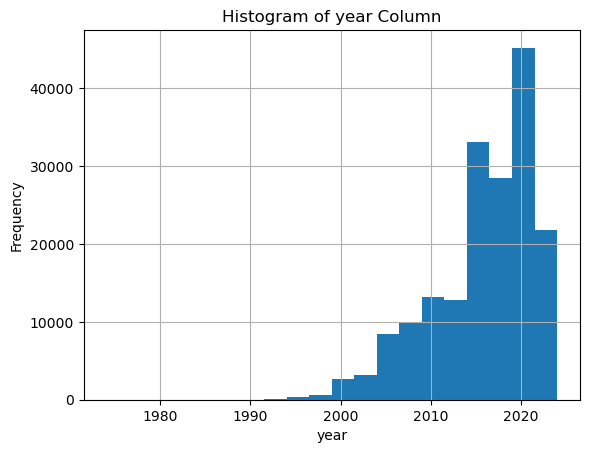

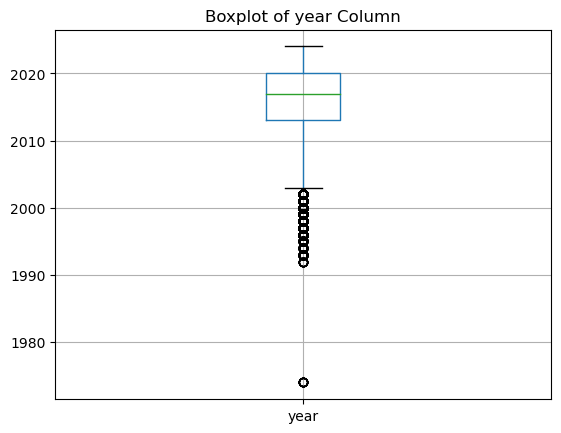

In [154]:
# Year column

# Histogram
df_final_cleaned['year'].hist(bins=20)
plt.title('Histogram of year Column')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()

# Boxplot
df_final_cleaned.boxplot(column='year')
plt.title('Boxplot of year Column')
plt.show()


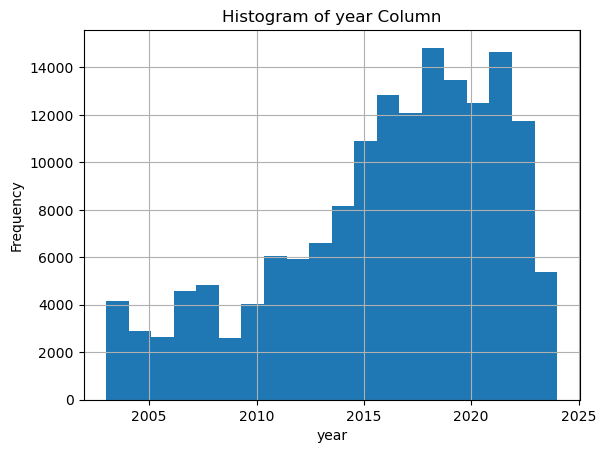

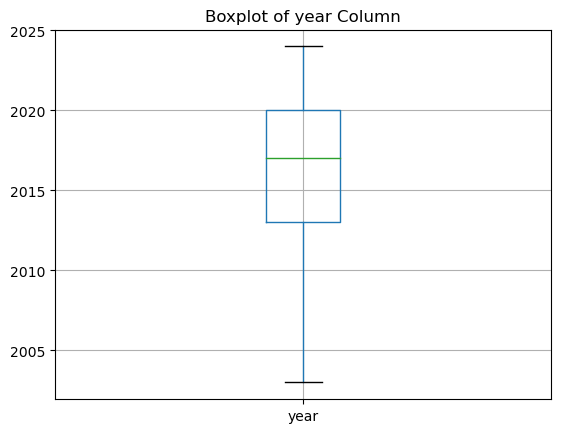

In [112]:
# Year column after filtering outliers for price

# Histogram
filtered_no_outliers_df['year'].hist(bins=20)
plt.title('Histogram of year Column')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()

# Boxplot
filtered_no_outliers_df.boxplot(column='year')
plt.title('Boxplot of year Column')
plt.show()


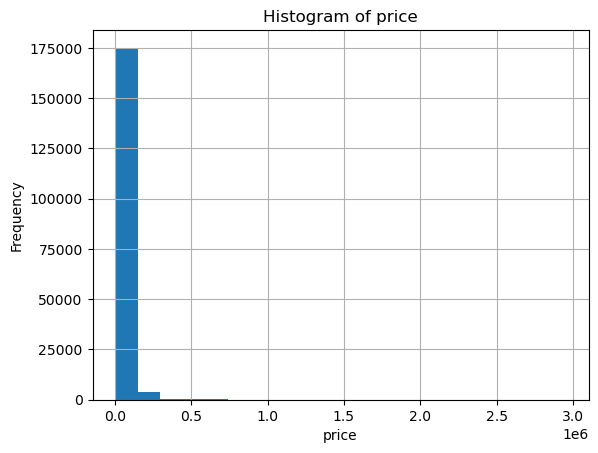

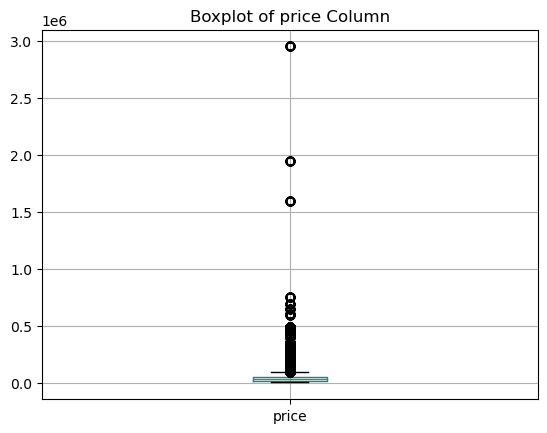

In [155]:
# Detected price outliers here
# Price column

# Histogram
df_final_cleaned['price'].hist(bins=20)
plt.title('Histogram of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

# Boxplot
df_final_cleaned.boxplot(column='price')
plt.title('Boxplot of price Column')
plt.show()


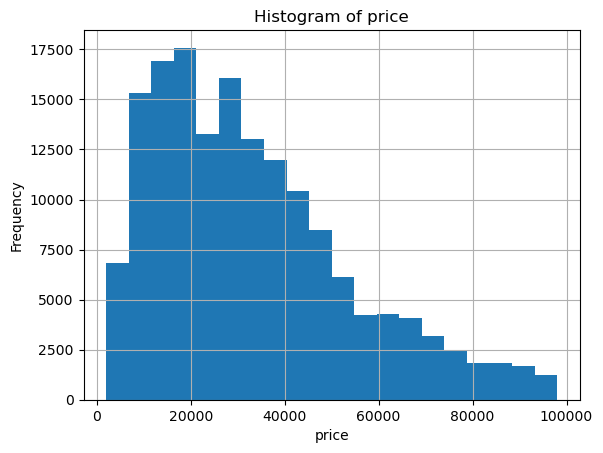

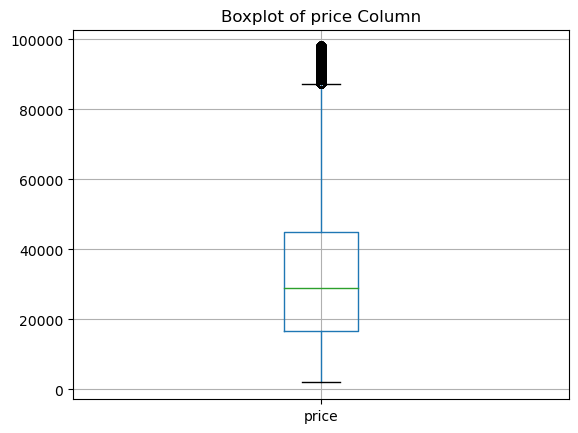

In [114]:
# Price column, post filtering out outliers

# Histogram
filtered_no_outliers_df['price'].hist(bins=20)
plt.title('Histogram of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

# Boxplot
filtered_no_outliers_df.boxplot(column='price')
plt.title('Boxplot of price Column')
plt.show()


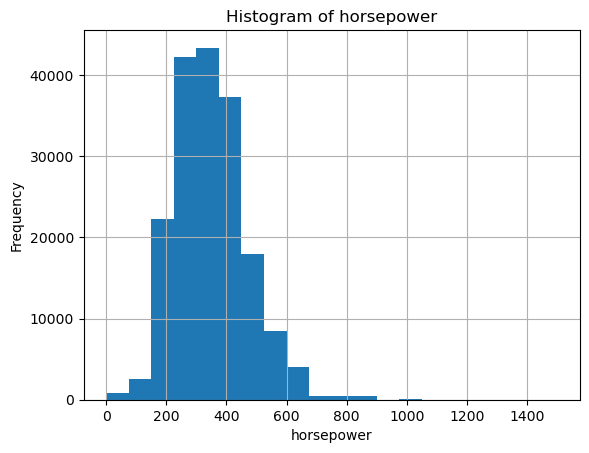

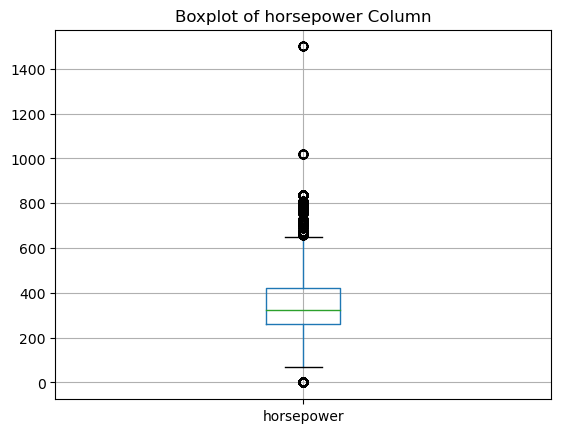

In [156]:
# Detected outliers here
# Horsepower column

# Histogram
df_final_cleaned['horsepower'].hist(bins=20)
plt.title('Histogram of horsepower')
plt.xlabel('horsepower')
plt.ylabel('Frequency')
plt.show()

# Boxplot
df_final_cleaned.boxplot(column='horsepower')
plt.title('Boxplot of horsepower Column')
plt.show()

In [116]:
filtered_no_outliers_df

id          brand           model      trim  year exterior_color interior_color  mileage  horsepower  liters  cylinders transmission fuel_type  damage  clean_title  price
3            3        Genesis             G90  Ultimate  2017          black          Black    19500       420.0     5.0          8    Automatic  Gasoline       0         True  45000
4            4  Mercedes-Benz          Metris      Base  2021          black          Beige     7388       208.0     2.0          4    Automatic  Gasoline       0         True  97500
5            5           Audi              A6     Sport  2018          white          Black    40950       252.0     2.0          4    Automatic  Gasoline       0         True  29950
6            6           Audi            A8 L      3.0T  2016          black          Black    62200       333.0     3.0          6    Automatic  Gasoline       0         True  28500
7            7      Chevrolet  Silverado 1500       1LZ  2016          white           Gray   102604       355.0     5.3          8    Automatic  Gasoline       0         True  12500
...        ...            ...             ...       ...   ...            ...            ...      ...         ...     ...        ...          ...       ...     ...          ...    ...
188526  188526            GMC        Yukon XL    Denali  2016            red          Black    89291       420.0     6.2          8    Automatic  Gasoline       1         True  24700
188528  188528       Cadillac    Escalade ESV  Platinum  2017          white          Beige    49000       420.0     6.2          8    Automatic  Gasoline       0         True  27500
188529  188529  Mercedes-Benz             C43      Base  2018          white          Black    28600       385.0     3.0          6    Automatic  Gasoline       1         True  30000
188530  188530  Mercedes-Benz           GLC63      Base  2021          white          Black    13650       469.0     4.0          8    Automatic  Gasoline       0         True  86900
188532  188532        Porsche           Macan      Base  2016          white          Black    59500       252.0     2.0          4    Automatic  Gasoline       0         True  28995

[160970 rows x 16 columns]

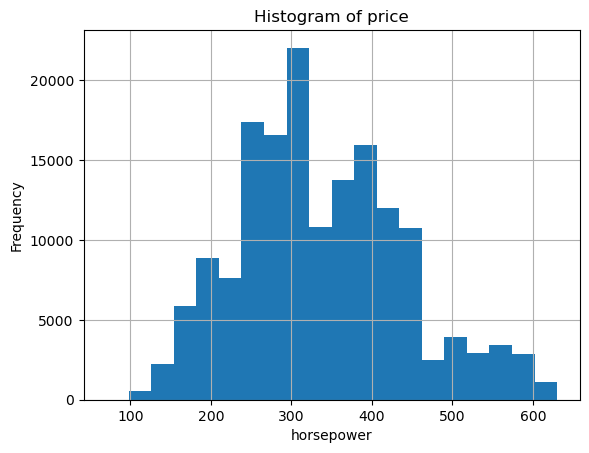

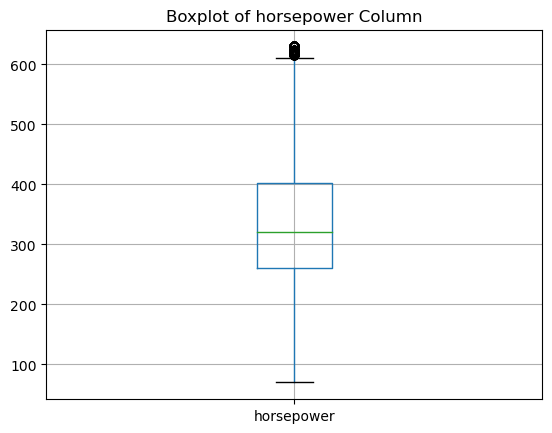

In [117]:
# Horsepower column, post filtering out outliers

# Histogram
filtered_no_outliers_df['horsepower'].hist(bins=20)
plt.title('Histogram of price')
plt.xlabel('horsepower')
plt.ylabel('Frequency')
plt.show()

# Boxplot
filtered_no_outliers_df.boxplot(column='horsepower')
plt.title('Boxplot of horsepower Column')
plt.show()

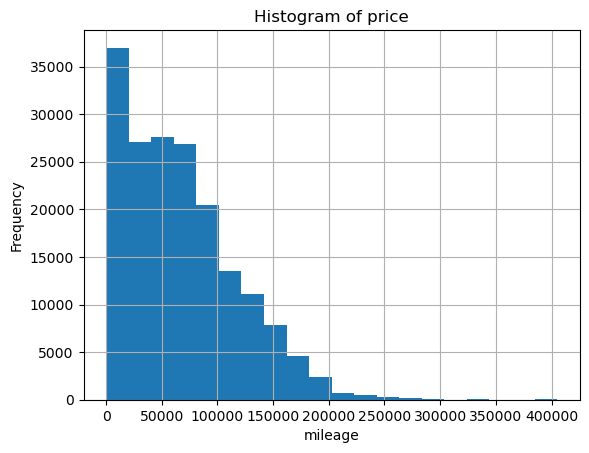

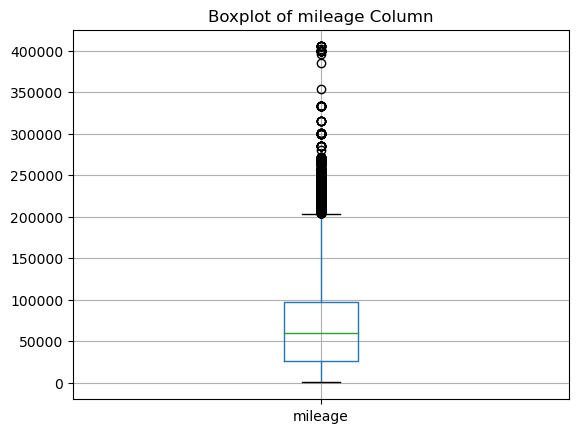

In [157]:
# Detecting outliers
# Mileage column, post filtering out outliers

# Histogram
df_final_cleaned['mileage'].hist(bins=20)
plt.title('Histogram of price')
plt.xlabel('mileage')
plt.ylabel('Frequency')
plt.show()

# Boxplot
df_final_cleaned.boxplot(column='mileage')
plt.title('Boxplot of mileage Column')
plt.show()

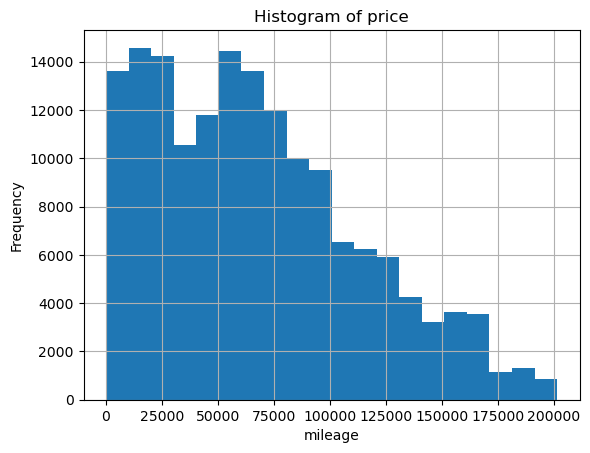

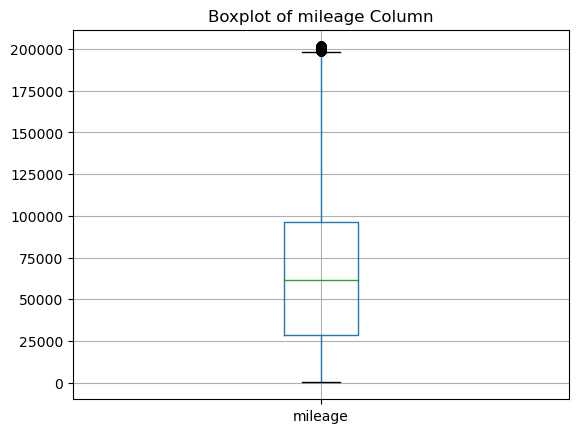

In [119]:
# Mileage column, post filtering out outliers

# Histogram
filtered_no_outliers_df['mileage'].hist(bins=20)
plt.title('Histogram of price')
plt.xlabel('mileage')
plt.ylabel('Frequency')
plt.show()

# Boxplot
filtered_no_outliers_df.boxplot(column='mileage')
plt.title('Boxplot of mileage Column')
plt.show()

In [120]:
filtered_no_outliers_df.columns

Index(['id', 'brand', 'model', 'trim', 'year', 'exterior_color', 'interior_color', 'mileage', 'horsepower', 'liters', 'cylinders', 'transmission', 'fuel_type', 'damage', 'clean_title', 'price'], dtype='object')

In [121]:
numerical_cols = filtered_no_outliers_df.select_dtypes('number').columns.to_list()

In [122]:
numerical_cols.remove('id')

In [123]:
numerical_cols.remove('damage')


In [124]:
numerical_cols

['year', 'mileage', 'horsepower', 'liters', 'cylinders', 'price']

In [125]:
numerical_cols

['year', 'mileage', 'horsepower', 'liters', 'cylinders', 'price']

In [126]:
filtered_no_outliers_df.columns

Index(['id', 'brand', 'model', 'trim', 'year', 'exterior_color', 'interior_color', 'mileage', 'horsepower', 'liters', 'cylinders', 'transmission', 'fuel_type', 'damage', 'clean_title', 'price'], dtype='object')

In [127]:
distribution_cols = numerical_cols

distribution_cols = distribution_cols + ['brand', 'exterior_color', 'transmission', 'fuel_type']

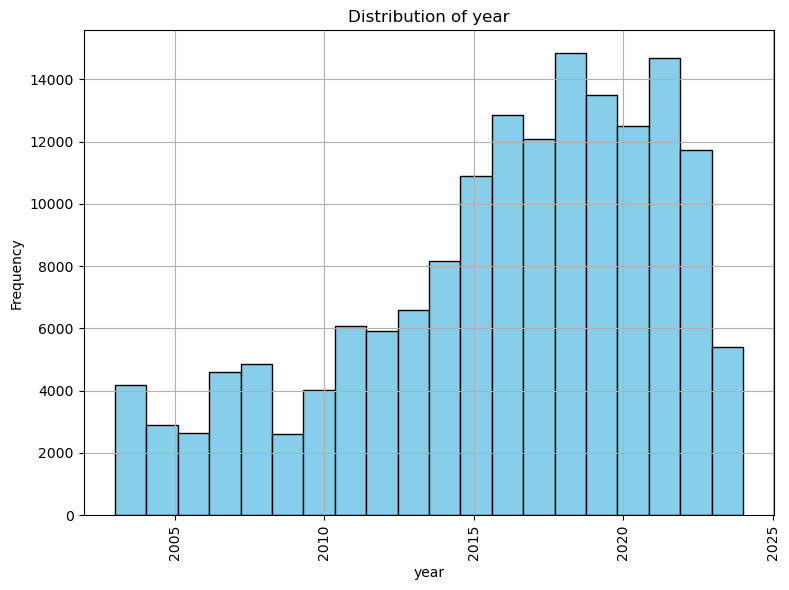

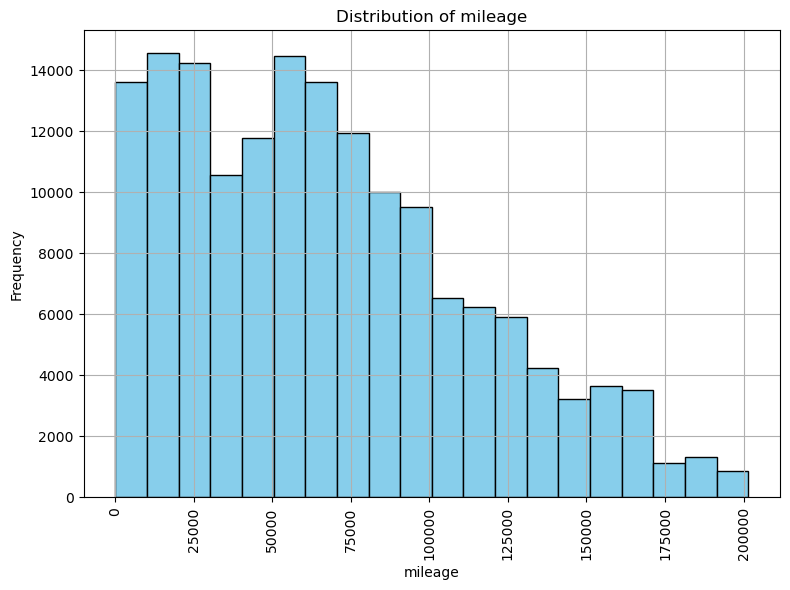

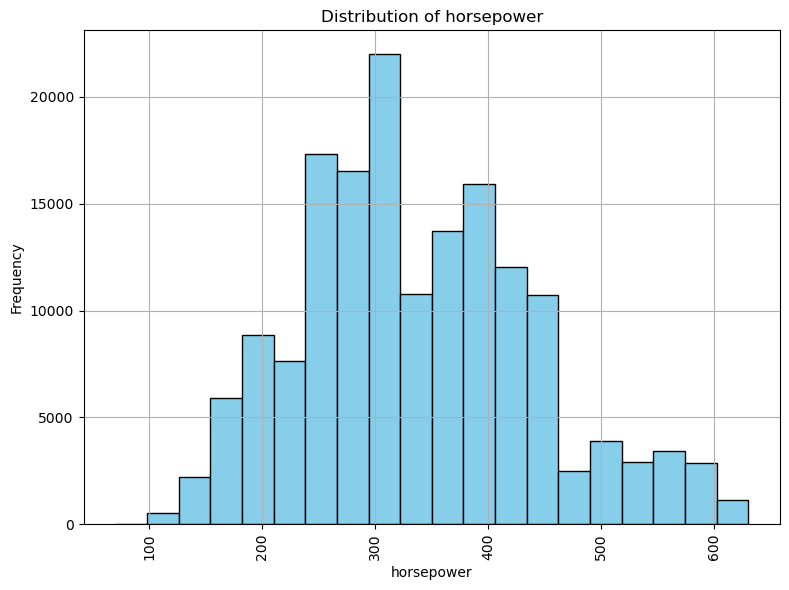

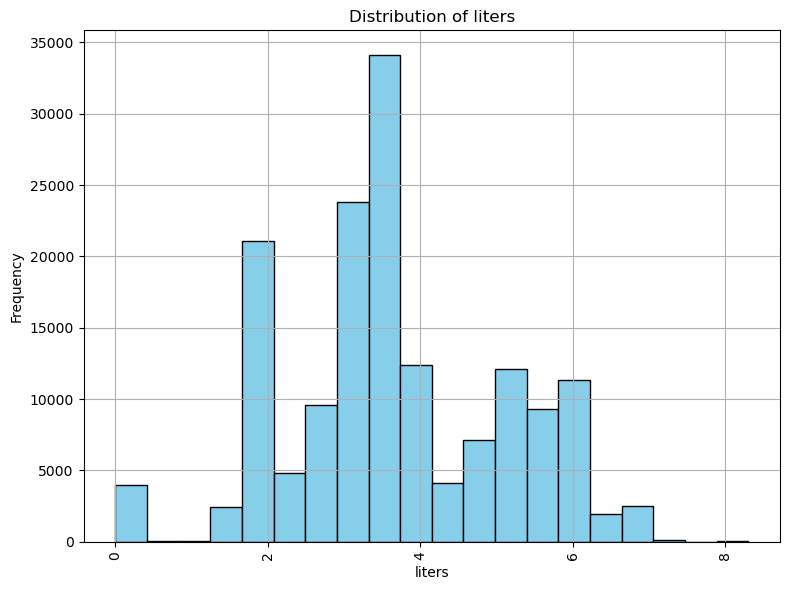

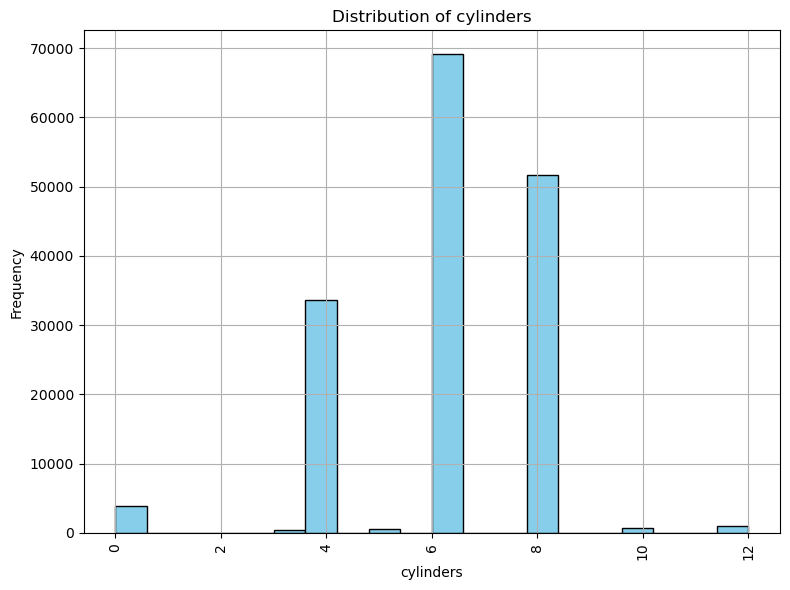

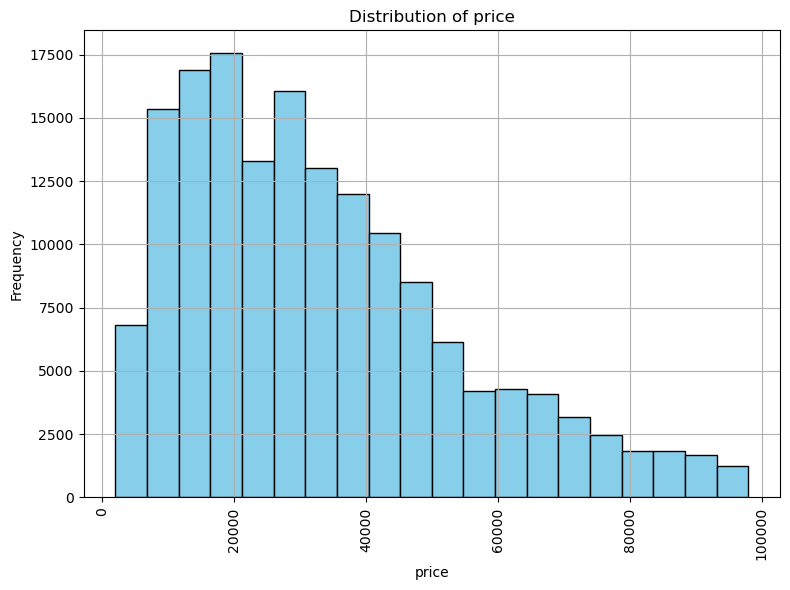

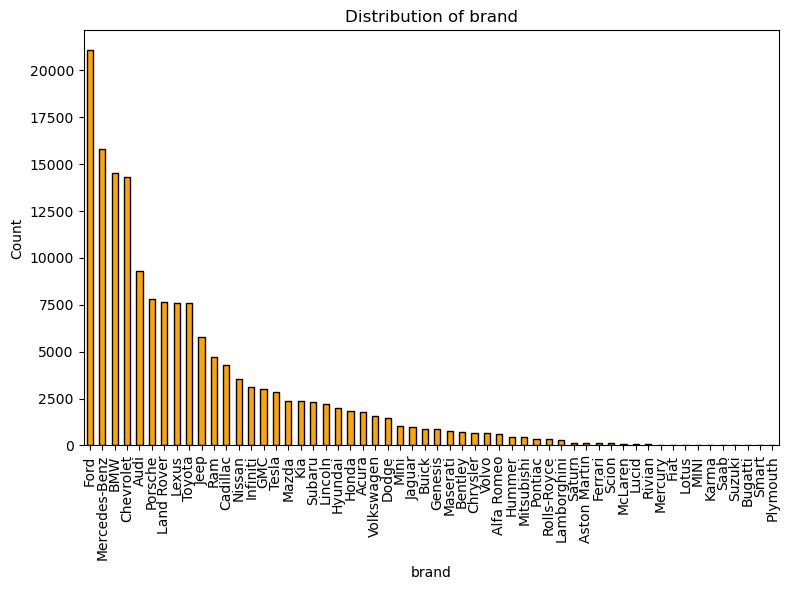

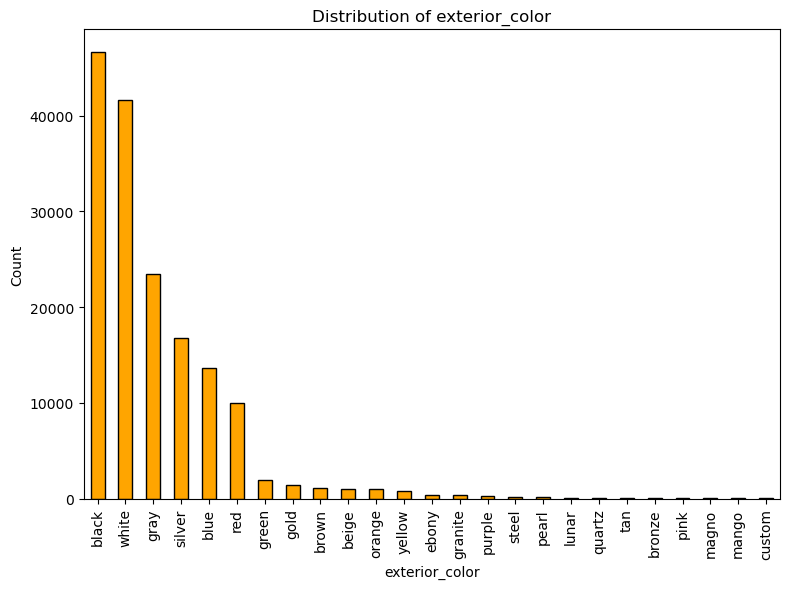

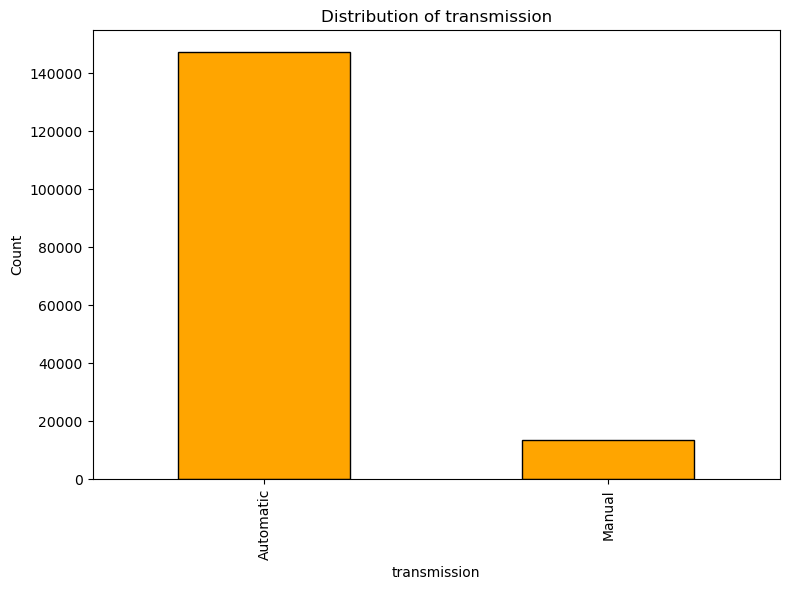

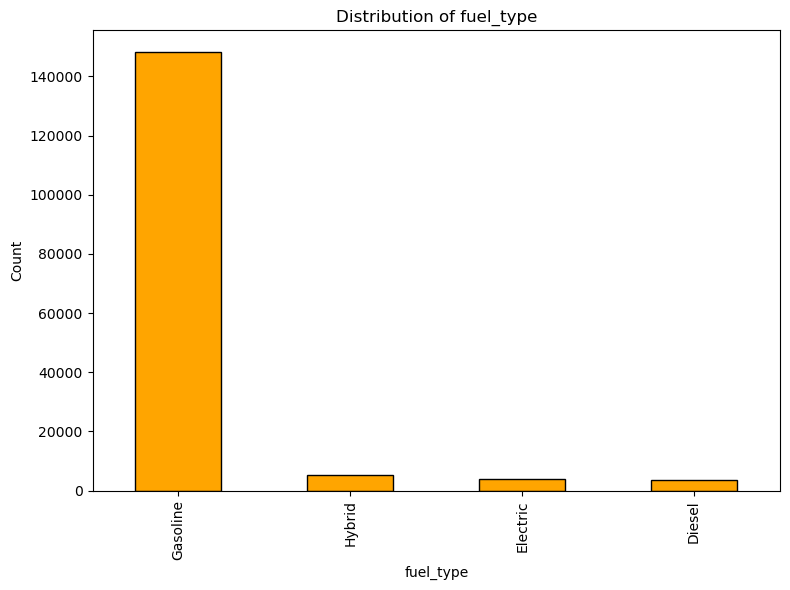

In [128]:
# Iterate through each column and plot the appropriate distribution
for column in distribution_cols:
    plt.figure(figsize=(8, 6))
    
    # Check if the column is numerical or categorical
    if pd.api.types.is_numeric_dtype(filtered_no_outliers_df[column]):
        # Numerical column: plot a histogram
        filtered_no_outliers_df[column].hist(bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        # Categorical column: plot a bar plot
        filtered_no_outliers_df[column].value_counts().plot(kind='bar', color='orange', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## Univariate Analysis Conclusion

*Ordered by graph*

1. The cars offered in the USA used car market seem to be fairly new, with most of the cars are from the past 5 years.
2. Most offered cars have not been driven over 150,000 mileage, which could mean there's a pattern for purchase behavior as people tend to sell their cars and buy a new one when they have driven it for 150,000 miles.
3. 50% of the horsepower spec falls between 200 and 600, with 25% of that being about 300.
4. The engine liters seem to be split into 2 ranges, 2.0 to 4.0, and 4.0 to 6.0.
5. Cars with engine that have 6 cylinders seem to be what is mostly offered, with 8 cylinders trailing behind it, which could also explain the engine liters distribution.
6. Most cars seem to be below the price of 100,000, with the median being around 21,000.
7. The most sold brands of used cars in the USA market are Ford, Mercedes, Chevrolet, BMW, Audi, Porsche, Toyota, Lexus, Land Rover, and Jeep. This could indicate the popular choices too.
8. And the top 5 colors seem to be the standard colors, Black, White, Gray, Silver, and Blue.
9. The popular Transmission type is the Automatic, leading with about 90% of all cars.
10. The prefered Fuel Type in the US is the Gasoline, with over 140,000 cars in the dataset favoring that observation.

# Bi/Multivariate Analysis

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


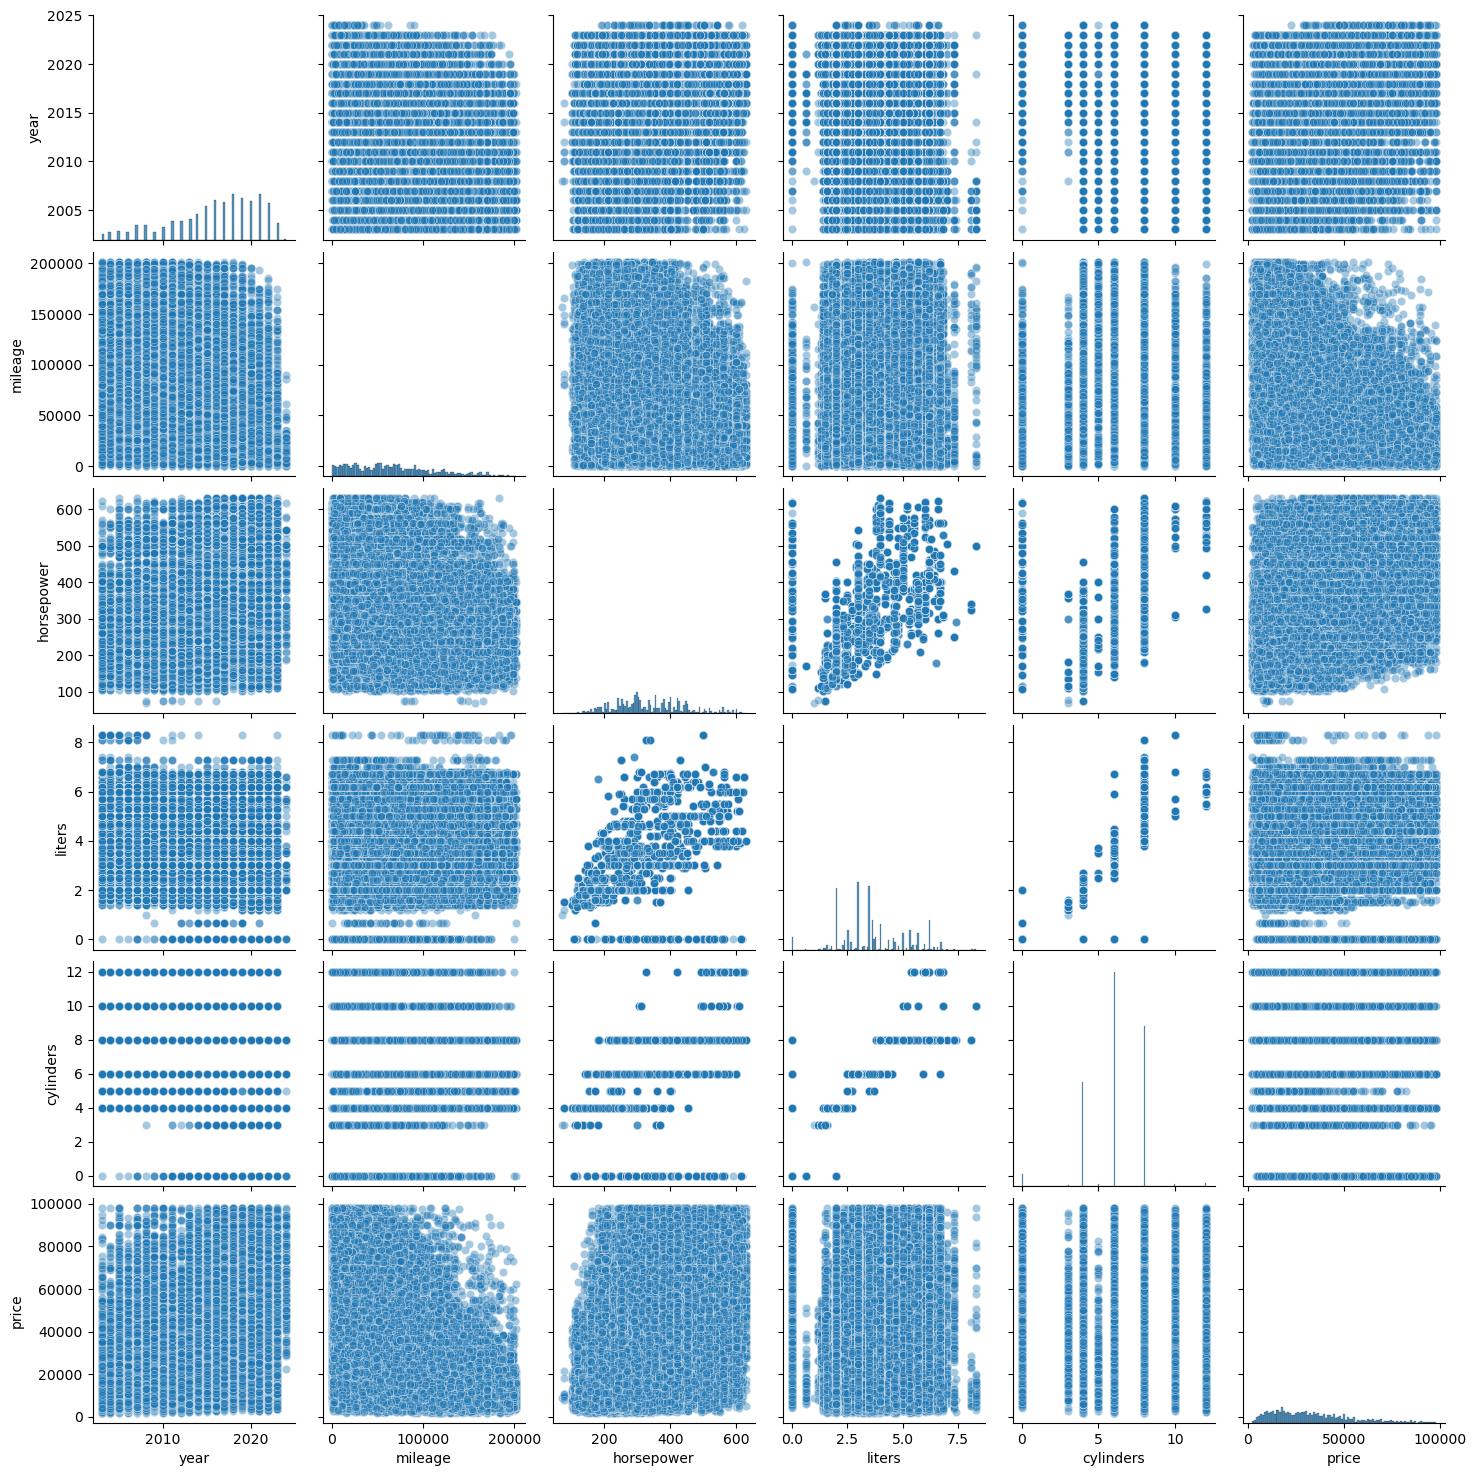

In [129]:
sns.pairplot(filtered_no_outliers_df[numerical_cols], kind='scatter', plot_kws={'alpha': 0.4})

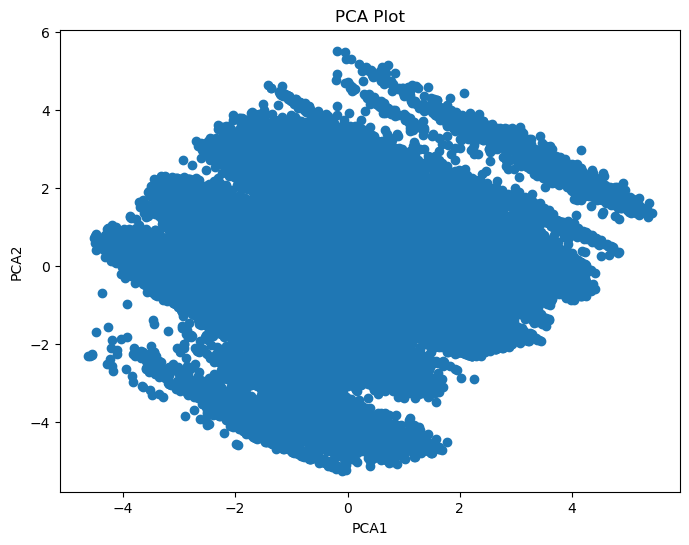

In [130]:


# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_no_outliers_df[['year', 'mileage', 'horsepower', 'liters', 'cylinders', 'price']])  # Standardize numerical columns

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.title('PCA Plot')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [131]:
clustering_df = filtered_no_outliers_df.copy()

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


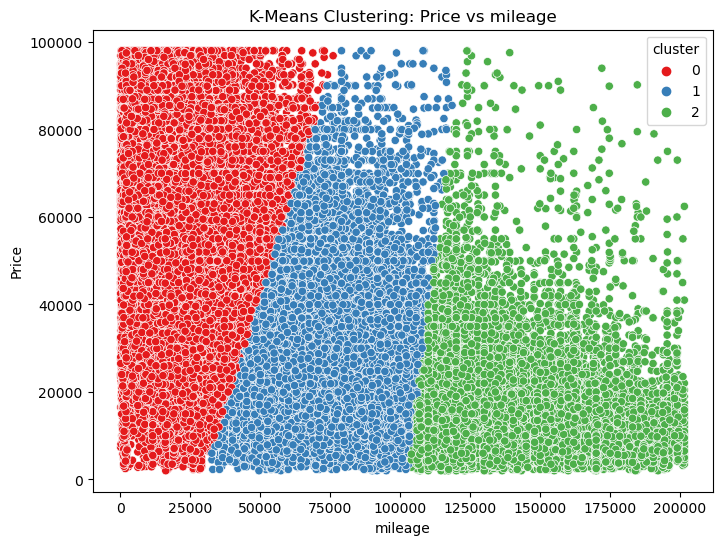

In [132]:

# Prepare numerical data
X = clustering_df[['year', 'mileage', 'horsepower', 'liters', 'cylinders', 'price']]  # Example: Use numerical columns

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3)
clustering_df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mileage', y='price', hue='cluster', data=clustering_df, palette='Set1')
plt.title('K-Means Clustering: Price vs mileage')
plt.xlabel('mileage')
plt.ylabel('Price')
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


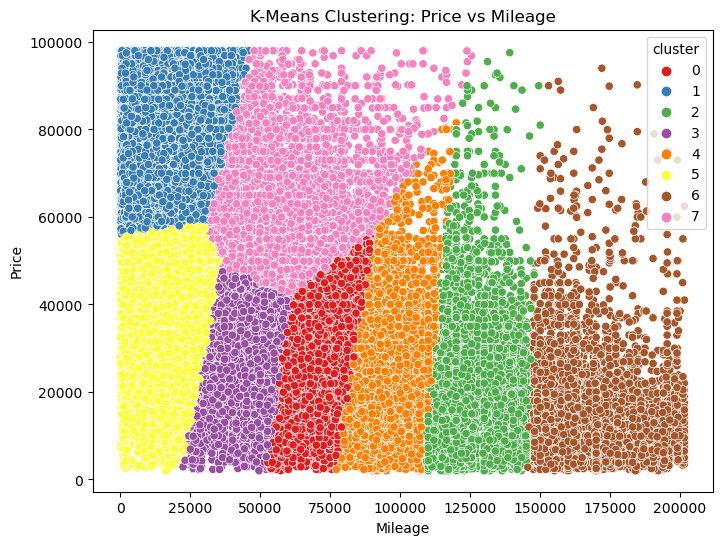

In [158]:
from sklearn.cluster import KMeans

# Prepare numerical data
X = clustering_df[['year', 'mileage', 'horsepower', 'liters', 'cylinders', 'price']]  # Example: Use numerical columns

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=8)
clustering_df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mileage', y='price', hue='cluster', data=clustering_df, palette='Set1')
plt.title('K-Means Clustering: Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


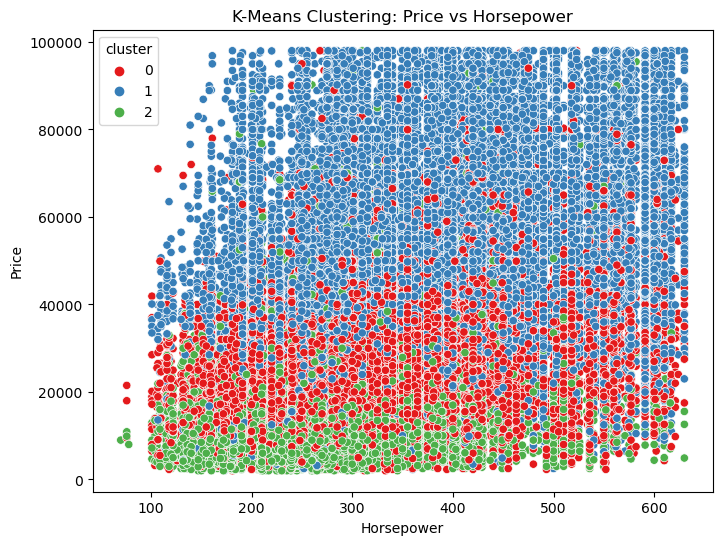

In [134]:
from sklearn.cluster import KMeans

# Prepare numerical data
X = clustering_df[['year', 'mileage', 'horsepower', 'liters', 'cylinders', 'price']]  # Example: Use numerical columns

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3)
clustering_df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='price', hue='cluster', data=clustering_df, palette='Set1')
plt.title('K-Means Clustering: Price vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()


### Correlations Section

In [135]:
numeric_df = filtered_no_outliers_df.select_dtypes(include=['number'])
numeric_df.drop(columns='id', inplace=True)

In [136]:
numeric_df

year  mileage  horsepower  liters  cylinders  damage  price
3       2017    19500       420.0     5.0          8       0  45000
4       2021     7388       208.0     2.0          4       0  97500
5       2018    40950       252.0     2.0          4       0  29950
6       2016    62200       333.0     3.0          6       0  28500
7       2016   102604       355.0     5.3          8       0  12500
...      ...      ...         ...     ...        ...     ...    ...
188526  2016    89291       420.0     6.2          8       1  24700
188528  2017    49000       420.0     6.2          8       0  27500
188529  2018    28600       385.0     3.0          6       1  30000
188530  2021    13650       469.0     4.0          8       0  86900
188532  2016    59500       252.0     2.0          4       0  28995

[160970 rows x 7 columns]

In [137]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix

year   mileage  horsepower    liters  cylinders    damage     price
year        1.000000 -0.681562    0.322026 -0.054385  -0.079721 -0.251960  0.629269
mileage    -0.681562  1.000000   -0.370532  0.020511   0.010369  0.306215 -0.658961
horsepower  0.322026 -0.370532    1.000000  0.520914   0.552022 -0.177373  0.499534
liters     -0.054385  0.020511    0.520914  1.000000   0.903322 -0.002359  0.125695
cylinders  -0.079721  0.010369    0.552022  0.903322   1.000000 -0.007695  0.132178
damage     -0.251960  0.306215   -0.177373 -0.002359  -0.007695  1.000000 -0.268292
price       0.629269 -0.658961    0.499534  0.125695   0.132178 -0.268292  1.000000

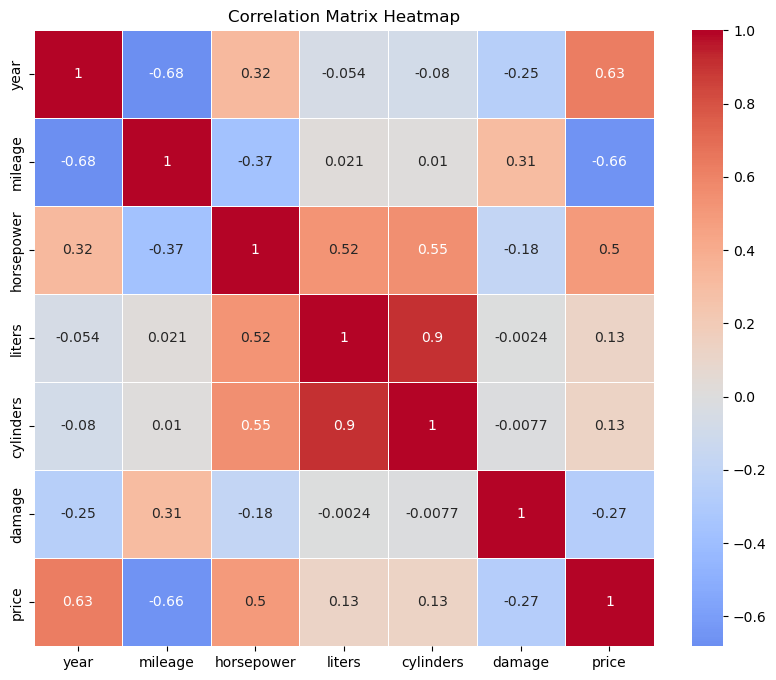

In [138]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


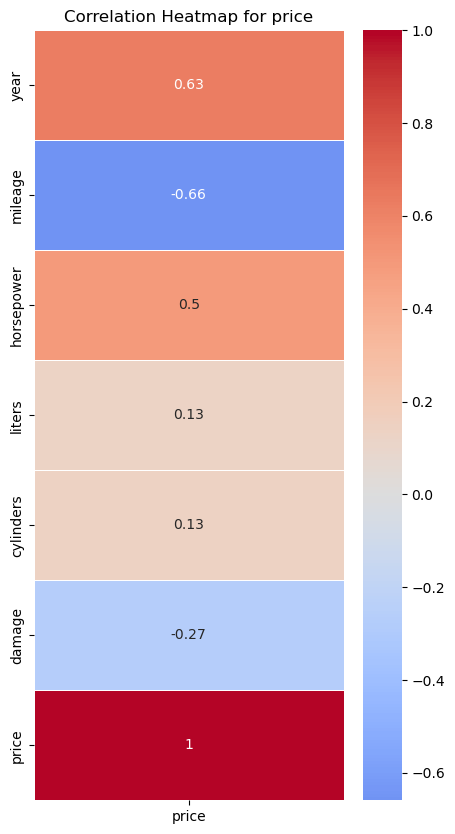

In [139]:


# Select the column you want to check the correlation for (e.g., 'price')
column_name = 'price'  

# Calculate the correlation of this column with other numerical columns
correlation_with_column =  correlation_matrix[['price']]  

# Plot the heatmap with correlation values
plt.figure(figsize=(5, 10))  
sns.heatmap(correlation_with_column, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, center=0)

plt.title(f'Correlation Heatmap for {column_name}')
plt.show()


In [140]:
filtered_no_outliers_df

id          brand           model      trim  year exterior_color interior_color  mileage  horsepower  liters  cylinders transmission fuel_type  damage  clean_title  price
3            3        Genesis             G90  Ultimate  2017          black          Black    19500       420.0     5.0          8    Automatic  Gasoline       0         True  45000
4            4  Mercedes-Benz          Metris      Base  2021          black          Beige     7388       208.0     2.0          4    Automatic  Gasoline       0         True  97500
5            5           Audi              A6     Sport  2018          white          Black    40950       252.0     2.0          4    Automatic  Gasoline       0         True  29950
6            6           Audi            A8 L      3.0T  2016          black          Black    62200       333.0     3.0          6    Automatic  Gasoline       0         True  28500
7            7      Chevrolet  Silverado 1500       1LZ  2016          white           Gray   102604       355.0     5.3          8    Automatic  Gasoline       0         True  12500
...        ...            ...             ...       ...   ...            ...            ...      ...         ...     ...        ...          ...       ...     ...          ...    ...
188526  188526            GMC        Yukon XL    Denali  2016            red          Black    89291       420.0     6.2          8    Automatic  Gasoline       1         True  24700
188528  188528       Cadillac    Escalade ESV  Platinum  2017          white          Beige    49000       420.0     6.2          8    Automatic  Gasoline       0         True  27500
188529  188529  Mercedes-Benz             C43      Base  2018          white          Black    28600       385.0     3.0          6    Automatic  Gasoline       1         True  30000
188530  188530  Mercedes-Benz           GLC63      Base  2021          white          Black    13650       469.0     4.0          8    Automatic  Gasoline       0         True  86900
188532  188532        Porsche           Macan      Base  2016          white          Black    59500       252.0     2.0          4    Automatic  Gasoline       0         True  28995

[160970 rows x 16 columns]

In [153]:
len(filtered_no_outliers_df['brand'].unique())

56

# Final Thoughts
Seems as though there are good correlations between Price and the Model Year, Mileage, and Horsepower/Engine, and a negative correlation with Damages, which is exactly what we need.

Features that MUST be used in the Machine Learning training:

1. Year.
2. Mileage.
3. Features of Engine specs, horsepower or liters or cylinders, or maybe combine the 3 somehow to have a representation of the Engine as a whole (Horsepower is a pretty good representation of the average person car knowledge).
4. Idealy, Brand and Model should be also included as categorical features.

In [141]:
# filtered_no_outliers_df.to_csv('USA_car_data_no_ouliers.csv', index=False)